### This notebook is supposed to generate the results and graphs of attention analysis and t-SNE presented in the paper.

The graphs are also saved as a pdf in `results/` directory.

In [ ]:
from utils import load_codesearchnet, get_max_edges, draw_map

import os
import json
import pickle
import numpy as np..
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from sklearn.manifold import TSNE

### Thresholding -- F_score

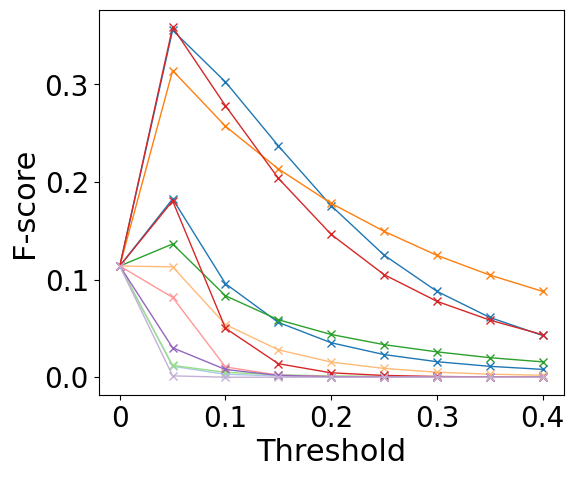

In [3]:
num_heads = 12
N = num_heads + 11
comp_file = 'graph_comparision/ast/exp_0/codebert_layer_5.json'
with open(comp_file) as f:
    comp_data = json.load(f)
f_score = comp_data['fscore']
cmap = plt.get_cmap('tab20')
fig = plt.gcf()
fig.set_size_inches(6,5)

for i in range(num_heads):
    color = cmap(float(i/N))
    f_score_head = f_score[str(i)]
    keys = list(f_score_head.keys())
    values = list(f_score_head.values())
    
    for j, value in enumerate(values):
        assert f_score_head[keys[j]] == value
    plt.xticks(ticks = [0, 2, 4, 6, 8])
    plt.tick_params(labelsize = 20)
    plt.plot(keys, values, marker = 'x', c = color, markersize = 6, linewidth=1.0, label = f'head {i}')
    plt.xlabel('Threshold', fontsize=22)
    plt.ylabel('F-score', fontsize=22)
fig.savefig('results/thr_cb_l_6.pdf',dpi=300, bbox_inches='tight')

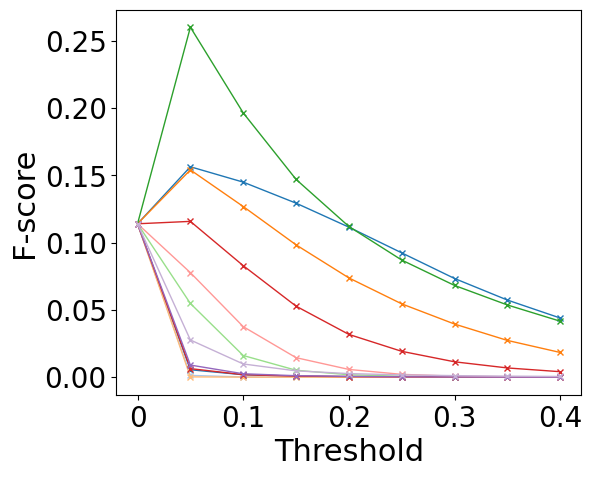

In [3]:
comp_file = 'graph_comparision/ast/exp_0/codebert_layer_11.json'
with open(comp_file) as f:
    comp_data = json.load(f)
f_score = comp_data['fscore']
cmap = plt.get_cmap('tab20')
fig = plt.gcf()
fig.set_size_inches(6,5)

for i in range(num_heads):
    color = cmap(float(i/N))
    f_score_head = f_score[str(i)]
    keys = list(f_score_head.keys())
    values = list(f_score_head.values())
    
    for j, value in enumerate(values):
        assert f_score_head[keys[j]] == value
    plt.xticks(ticks = [0, 2, 4, 6, 8])
    plt.tick_params(labelsize = 20)
    plt.plot(keys, values, marker = 'x', c = color, markersize = 4, linewidth=1.0, label = f'head {i}')
    plt.xlabel('Threshold', fontsize=22)
    plt.ylabel('F-score', fontsize=22)
fig.savefig('results/thr_cb_l_12.pdf',dpi=300, bbox_inches='tight')

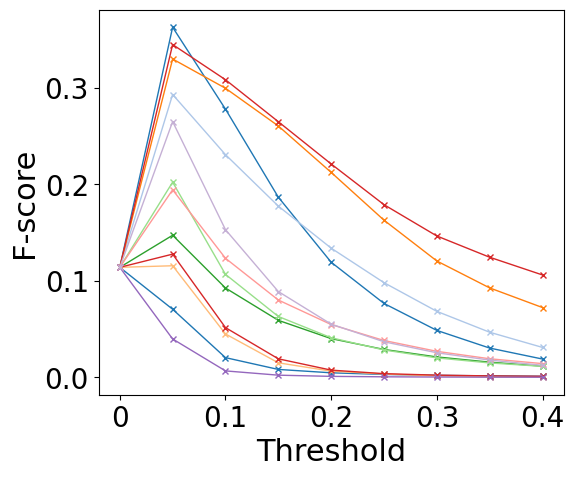

In [4]:
comp_file = 'graph_comparision/ast/exp_0/codet5_layer_5.json'
with open(comp_file) as f:
    comp_data = json.load(f)
f_score = comp_data['fscore']
cmap = plt.get_cmap('tab20')
fig = plt.gcf()
fig.set_size_inches(6,5)

for i in range(num_heads):
    color = cmap(float(i/N))
    f_score_head = f_score[str(i)]
    keys = list(f_score_head.keys())
    values = list(f_score_head.values())
    
    for j, value in enumerate(values):
        assert f_score_head[keys[j]] == value
    plt.xticks(ticks = [0, 2, 4, 6, 8])
    plt.tick_params(labelsize = 20)
    plt.plot(keys, values, marker = 'x', c = color, markersize = 4, linewidth=1.0, label = f'head {i}')
    plt.xlabel('Threshold', fontsize=22)
    plt.ylabel('F-score', fontsize=22)
fig.savefig('results/thr_ct5_l_6.pdf',dpi=300, bbox_inches='tight')

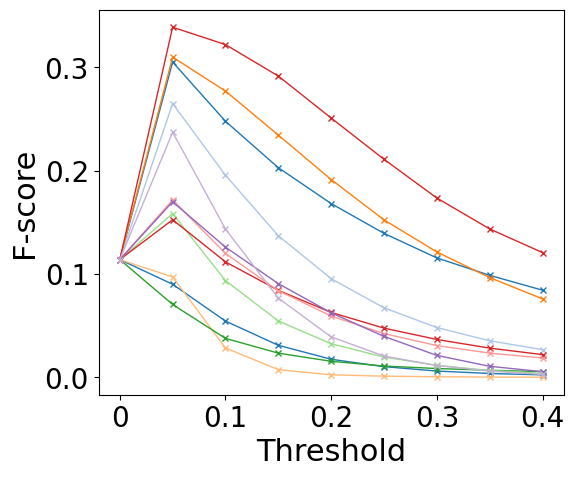

In [5]:
comp_file = 'graph_comparision/ast/exp_0/codet5_layer_11.json'
with open(comp_file) as f:
    comp_data = json.load(f)
f_score = comp_data['fscore']
cmap = plt.get_cmap('tab20')
fig = plt.gcf()
fig.set_size_inches(6,5)

for i in range(num_heads):
    color = cmap(float(i/N))
    f_score_head = f_score[str(i)]
    keys = list(f_score_head.keys())
    values = list(f_score_head.values())
    
    for j, value in enumerate(values):
        assert f_score_head[keys[j]] == value
    plt.xticks(ticks = [0, 2, 4, 6, 8])
    plt.tick_params(labelsize = 20)
    plt.plot(keys, values, marker = 'x', c = color, markersize = 4, linewidth=1.0, label = f'head {i}')
    plt.xlabel('Threshold', fontsize=22)
    plt.ylabel('F-score', fontsize=22)
fig.savefig('results/thr_ct5_l_12.pdf',dpi=300, bbox_inches='tight')

### Attention maps 
Note: requires that attention maps are save by running `save_graph_info.py`

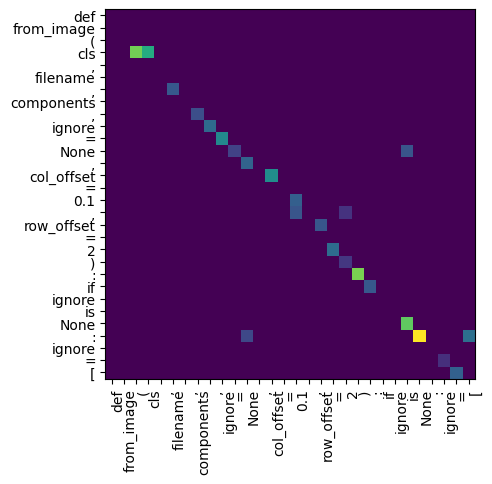

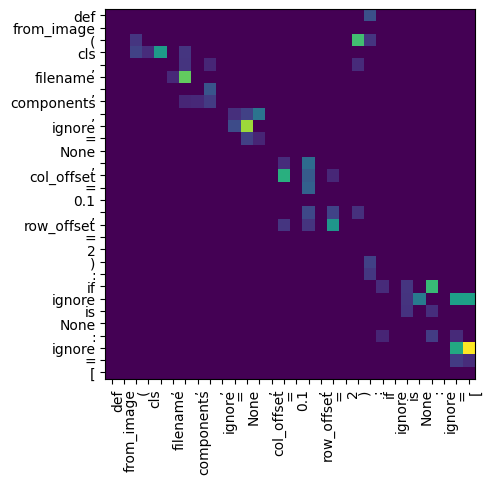

In [6]:
codes = load_codesearchnet('exp_data/exp_0.jsonl')
code = codes[1614]
code_file = code['code_file']+'.pkl'
with open(os.path.join('graph_info/exp_0/codebert/', code_file), 'rb') as f:
    graph_info = pickle.load(f)
    
model_graphs = graph_info['model_graphs']
tokens = graph_info['ast_tokens']

thr_old = '0.3'
thr = '0.05'
layer = 9

graph_comp_file = f'graph_comparision/ast/exp_0/codebert_layer_{layer}.json'
with open(graph_comp_file, 'r') as f:
    comp_data = json.load(f)
    
precision = comp_data['precision']
precision_per_head = {}
for key, value in precision.items():
    precision_per_head[key] =  value[thr_old]
best_head_for_precision = max(precision_per_head.items(), key = lambda x: x[1])
best_head = model_graphs[layer][int(best_head_for_precision[0])]
best_head = get_max_edges(best_head, mode = 'threshold', threshold = float(thr))
draw_map(best_head[:30,:30], tokens[:30], figsize=(5,5), 
         save_loc=f'results/map_prec_t_03_cb_l_9_h_{best_head_for_precision[0]}.pdf', labelsize=10)

f_score = comp_data['fscore']
fscore_per_head = {}
for key, value in f_score.items():
    fscore_per_head[key] =  value[thr]
best_head_for_fscore = max(fscore_per_head.items(), key = lambda x: x[1])
best_head = model_graphs[layer][int(best_head_for_fscore[0])]
best_head = get_max_edges(best_head, mode = 'threshold', threshold = float(thr))
draw_map(best_head[:30,:30], tokens[:30], figsize=(5,5),
        save_loc=f'results/map_fscr_t_005__cb_l_9_h_{best_head_for_fscore[0]}.pdf', labelsize=10)

### Precision and recall

In [2]:
graph_comp_dir = 'graph_comparision/ast/exp_0/'
data_and_graphs = os.listdir(graph_comp_dir)
graph_comp_data = []

for data in data_and_graphs:
    if data.endswith('.json'):
        graph_comp_data.append(data)

thr = '0.3'
per_layer_eval = {thr : {}}

for data in graph_comp_data:
    with open(os.path.join(graph_comp_dir, data), 'r') as f:
        comp_data = json.load(f)
    
    splits = data.split('.')[0].split('_')
    model = splits[0]
    if splits[1] == 'large':
        model += '_large'
        layer = splits[3]
    else:
        layer = splits[2]
    
    layer = splits[-1]
    model = '_'.join(splits[:-2])
    layer = int(layer)
    #print(model, layer)
    
    f_score = comp_data['fscore']
    f_score_per_head = {}
    
    for key, value in f_score.items():
        f_score_per_head[key] =  value[thr]
    
    best_head_and_f_score = max(f_score_per_head.items(), key = lambda x: x[1])
    best_head = best_head_and_f_score[0]
    
    precision = comp_data['precision']
    recall = comp_data['recall']
    precision_best_head = precision[best_head][thr]
    recall_best_head = recall[best_head][thr]
    
    if not model in per_layer_eval[thr].keys():
        per_layer_eval[thr][model] = {
            'precision' : {},
            'recall' : {},
            'f_score' : {}
        }
    per_layer_eval[thr][model]['precision'][str(layer + 1)] = precision_best_head
    per_layer_eval[thr][model]['recall'][str(layer + 1)] = recall_best_head
    per_layer_eval[thr][model]['f_score'][str(layer + 1)] = best_head_and_f_score[1]

In [5]:
markers = {
    'codebert': 'o',
    'graphcodebert': 's',
    'unixcoder': '>',
    'plbart': 'p',
    
    'codet5': 'o',
    'codet5_musu': 's',
    'codet5p_220': '>',
    'codet5p_220_bi': 'p',
    
    'coderl': 'o',
    'codet5p_770': 's',
    'codet5_lntp': '>',
    'codegen': 'p',
    'codet5p_2b': 'P',
    'codet5p_2b_dec': '*'
}

model_names = {
    'codebert': 'CodeBERT',
    'graphcodebert': 'GraphCodeBERT',
    'unixcoder': 'UniXcoder',
    'plbart': 'PLBART',
    
    'codet5': 'CodeT5',
    'codet5_musu': 'CodeT5_musu',
    'codet5p_220': 'CodeT5+220',
    'codet5p_220_bi': 'CodeT5+220bi',
    
    'coderl': 'CodeRL',
    'codet5p_770': 'CodeT5+770',
    'codet5_lntp': 'CodeT5_lntp',
    'codegen': 'CodeGen',
    'codet5p_2b': 'CodeT5+2B',
    'codet5p_2b_dec': '2B_Decoder'
}

In [6]:
base = ['codebert', 'graphcodebert', 'unixcoder', 'plbart']
fine_tuned = ['codet5', 'codet5_musu', 'codet5p_220', 'codet5p_220_bi']
large = [ 'coderl',  'codegen', 'codet5p_2b','codet5p_2b_dec']
other = ['codet5_lntp', 'codet5p_770', 'coderl']

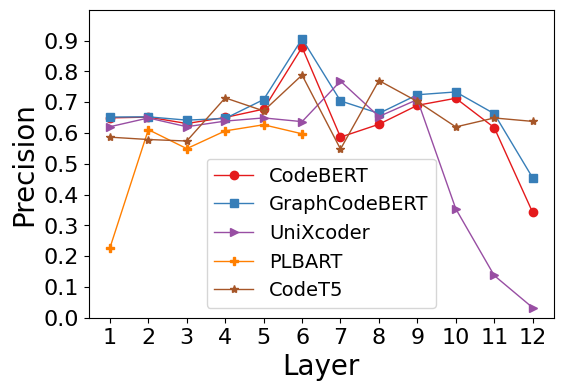

In [7]:
base_models = ['codebert', 'graphcodebert', 'unixcoder', 'plbart', 'codet5']
cmap = plt.get_cmap('Set1')


markers = {
    'codebert': 'o',
    'graphcodebert': 's',
    'unixcoder': '>',
    'plbart': 'P',
    
    'codet5': '*'}

thr = ['0.3']
N = len(base_models) * len(thr) + 1
fig = plt.gcf()
fig.set_size_inches(6,4)

for i, model in enumerate(base_models):
    model_precision = per_layer_eval[thr[0]][model]['precision']
    
    keys = list(model_precision.keys())
    values = list(model_precision.values())
    
    for j, value in enumerate(values):
        assert model_precision[keys[j]] == value
    
    x = [k for k in range(1, len(keys) +1 )]
    y = [values[keys.index(str(v))] for v in x]
    
    color = cmap(float((i)/N))
    plt.ylim(0, 1.0)
    plt.xticks(ticks = range(1,24))
    plt.yticks(ticks = np.arange(0, 1.0, 0.1))
    plt.tick_params(labelsize = 16)
    plt.plot(x, y, marker = markers[model], markersize = 6, 
                c = color, linewidth=1.0, label = model_names[model])

    plt.xlabel('Layer', fontsize=20)
    plt.ylabel('Precision', fontsize=20)
    plt.legend(fontsize=14)
fig.savefig('results/precision_0_3.pdf', dpi=300, bbox_inches='tight')
fig = None

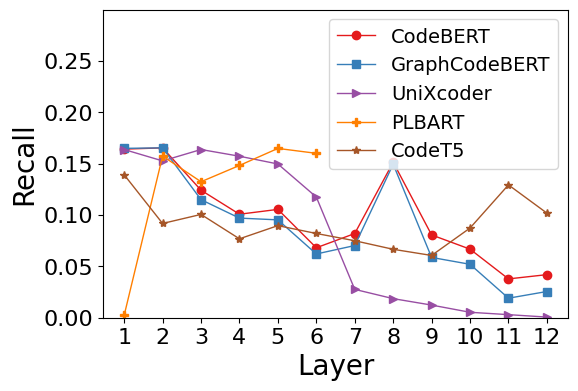

In [8]:
#recall
fig = plt.gcf()
fig.set_size_inches(6,4)
for i, model in enumerate(base_models):
    model_recall = per_layer_eval[thr[0]][model]['recall']
    keys = list(model_recall.keys())
    values = list(model_recall.values())
    
    for j, value in enumerate(values):
        assert model_recall[keys[j]] == value
    
    x = [k for k in range(1, len(keys) +1 )]
    y = [values[keys.index(str(v))] for v in x]
    color = cmap(float(i/N))
    plt.ylim(0, 0.3)
    plt.yticks(ticks = np.arange(0.0, 0.3, 0.05))
    plt.xticks(ticks = range(1,13))
    plt.tick_params(labelsize = 16)
    plt.plot(x, y, marker = markers[model], markersize = 6, 
                c = color, linewidth=1.0, label = model_names[model])
    
    plt.xlabel('Layer', fontsize=20)
    plt.ylabel('Recall', fontsize=20)
    plt.legend(fontsize=14)
fig.savefig('results/recall_0_3.pdf', dpi=300, bbox_inches='tight')
fig = None

In [9]:
# Precision and recall for ast and dfg
# DFG
graph_comp_dir = 'graph_comparision/dfg/exp_0/'
graph_comp_data = os.listdir(graph_comp_dir)
thr = '0.05'
per_layer_eval_dfg = {}

for data in graph_comp_data:
    with open(os.path.join(graph_comp_dir, data), 'r') as f:
        comp_data = json.load(f)
    
    splits = data.split('.')[0].split('_')
    model = splits[0]
    if splits[1] == 'large':
        model += '_large'
        layer = splits[3]
    else:
        layer = splits[2]
    
    layer = splits[-1]
    model = '_'.join(splits[:-2])
    layer = int(layer)
    f_score = comp_data['fscore']
    f_score_per_head = {}
    
    for key, value in f_score.items():
        f_score_per_head[key] =  value[thr]
        
    best_head_and_f_score = max(f_score_per_head.items(), key = lambda x: x[1])
    best_head = best_head_and_f_score[0]
    
    recall = comp_data['recall']
    recall_best_head = recall[best_head][thr]
    
    precision = comp_data['precision']
    precision_best_head = precision[best_head][thr]
    
    if not model in per_layer_eval_dfg.keys():
        per_layer_eval_dfg[model] = {
            'recall' : {},
            'f_score' : {},
            'precision': {}
        }
    
    per_layer_eval_dfg[model]['recall'][str(layer + 1)] = recall_best_head
    per_layer_eval_dfg[model]['precision'][str(layer + 1)] = precision_best_head
    per_layer_eval_dfg[model]['f_score'][str(layer + 1)] = best_head_and_f_score[1]
    
# AST
graph_comp_dir = 'graph_comparision/ast/exp_0/'
data_and_graphs = os.listdir(graph_comp_dir)
graph_comp_data = []

for data in data_and_graphs:
    if data.endswith('.json'):
        graph_comp_data.append(data)
        
thr = '0.05'
per_layer_eval_ast = {}
for data in graph_comp_data:
    with open(os.path.join(graph_comp_dir, data), 'r') as f:
        comp_data = json.load(f)
    
    splits = data.split('.')[0].split('_')
    model = splits[0]
    if splits[1] == 'large':
        model += '_large'
        layer = splits[3]
    else:
        layer = splits[2]
    
    layer = splits[-1]
    model = '_'.join(splits[:-2])
    layer = int(layer)
    
    f_score = comp_data['fscore']
    f_score_per_head = {}
    
    for key, value in f_score.items():
        f_score_per_head[key] =  value[thr]
    
    best_head_and_f_score = max(f_score_per_head.items(), key = lambda x: x[1])
    best_head = best_head_and_f_score[0]
    
    precision = comp_data['precision']
    recall = comp_data['recall']
    precision_best_head = precision[best_head][thr]
    recall_best_head = recall[best_head][thr]
    
    if not model in per_layer_eval_ast.keys():
        per_layer_eval_ast[model] = {
            'precision' : {},
            'recall' : {},
            'f_score' : {}
        }
    per_layer_eval_ast[model]['precision'][str(layer + 1)] = precision_best_head
    per_layer_eval_ast[model]['recall'][str(layer + 1)] = recall_best_head
    per_layer_eval_ast[model]['f_score'][str(layer + 1)] = best_head_and_f_score[1]

### Recall

#### AST

In [10]:

markers_base = {
    'codebert': 'o',
    'graphcodebert': 's',
    'unixcoder': '>',
    'plbart': 'P'}

base = ['codebert', 'graphcodebert', 'unixcoder', 'plbart']

fine_tuned = ['codet5', 'codet5_musu', 'codet5p_220', 'codet5p_220_bi']
markers_fine = {
    'codet5': 'o',
    'codet5_musu': 's',
    'codet5p_220': '>',
    'codet5p_220_bi': 'P'}

large = [ 'coderl',  'codegen', 'codet5p_2b','codet5p_2b_dec']
markers_large = {
    'coderl': 'o',
    'codegen': 's',
    'codet5p_2b': '>',
    'codet5p_2b_dec': 'P'}

other = ['codet5_lntp', 'codet5p_770', 'coderl']

markers_other = {
    'codet5_lntp': 'o',
    'codet5p_770': 's',
    'coderl': '>'}



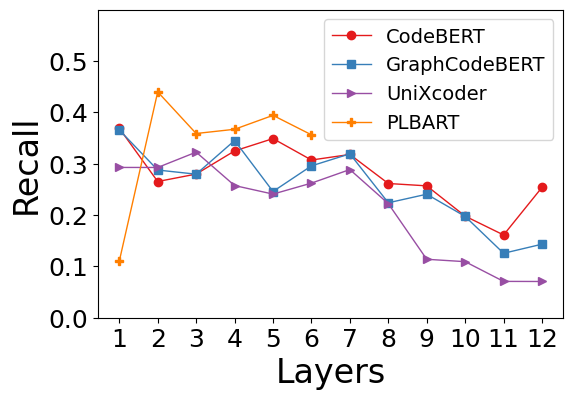

In [11]:
fig = plt.gcf()
fig.set_size_inches(6,4)
cmap = plt.get_cmap('Set1')
N = len(base) + 2

for i, model in enumerate(base):
    c_model = cmap(float(i/N))
    model_recall = per_layer_eval_ast[model]['recall']
    keys = list(model_recall.keys())
    values = list(model_recall.values())
    for j, value in enumerate(values):
        assert model_recall[keys[j]] == value

    x = [k for k in range(1, len(keys) + 1)]
    y = [values[keys.index(str(v))] for v in x]

    ast_vals = y
    plt.ylim(0, 0.6)
    plt.yticks(ticks = np.arange(0, 0.6, 0.1))
    plt.xticks(ticks = range(1,13))
    plt.tick_params(labelsize = 18)
    plt.plot(x, y, marker = markers_base[model], markersize = 6, c = c_model,
                                linewidth=1.0, label = f'{model_names[model]}')
    
plt.legend(fontsize=14)
plt.xlabel('Layers', fontsize = 24)
plt.ylabel('Recall', fontsize = 24)
fig.savefig('results/base/rec_ast_base.pdf', dpi=300, bbox_inches='tight') 

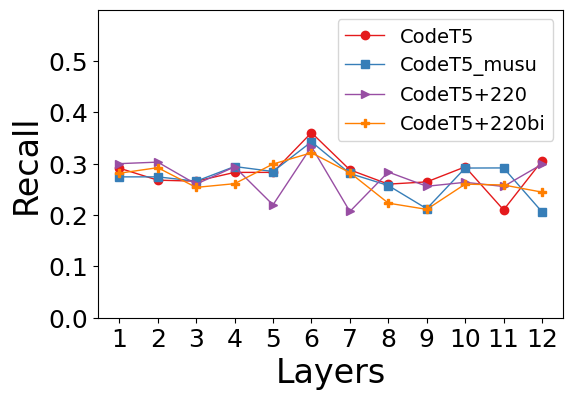

In [12]:
fig = plt.gcf()
fig.set_size_inches(6,4)
cmap = plt.get_cmap('Set1')
N = len(fine_tuned) + 2

for i, model in enumerate(fine_tuned):
    c_model = cmap(float(i/N))
    model_recall = per_layer_eval_ast[model]['recall']
    keys = list(model_recall.keys())
    values = list(model_recall.values())
    for j, value in enumerate(values):
        assert model_recall[keys[j]] == value

    x = [k for k in range(1, len(keys) + 1)]
    y = [values[keys.index(str(v))] for v in x]

    ast_vals = y
    plt.ylim(0, 0.6)
    plt.yticks(ticks = np.arange(0, 0.6, 0.1))
    plt.xticks(ticks = range(1,13))
    plt.tick_params(labelsize = 18)
    plt.plot(x, y, marker = markers_fine[model], markersize = 6, c = c_model,
                                linewidth=1.0, label = f'{model_names[model]}')
    
plt.legend(fontsize=14)
plt.xlabel('Layers', fontsize = 24)
plt.ylabel('Recall', fontsize = 24)
fig.savefig('results/fine_tuned/rec_ast_fine.pdf', dpi=300, bbox_inches='tight')

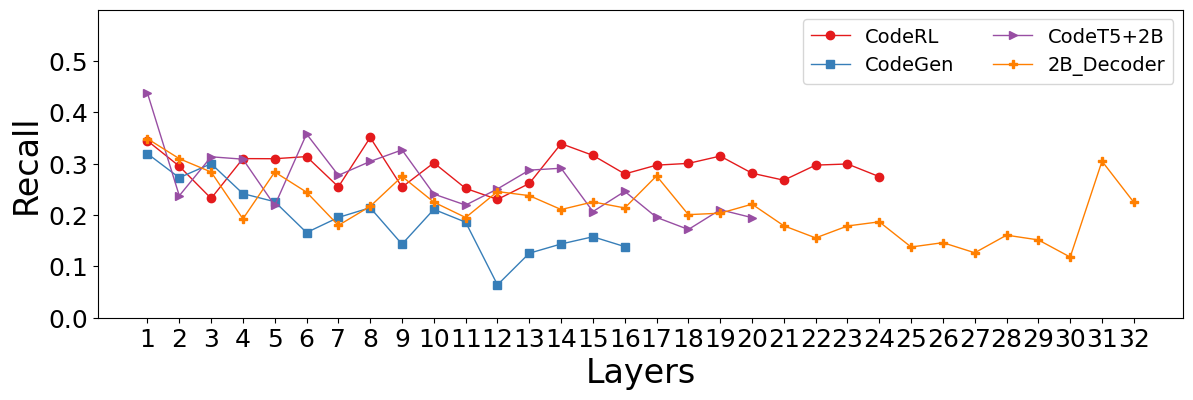

In [13]:
fig = plt.gcf()
fig.set_size_inches(14,4)
cmap = plt.get_cmap('Set1')
N = len(large) + 2

for i, model in enumerate(large):
    c_model = cmap(float(i/N))
    model_recall = per_layer_eval_ast[model]['recall']
    keys = list(model_recall.keys())
    values = list(model_recall.values())
    for j, value in enumerate(values):
        assert model_recall[keys[j]] == value

    x = [k for k in range(1, len(keys) + 1)]
    y = [values[keys.index(str(v))] for v in x]

    ast_vals = y
    plt.ylim(0, 0.6)
    plt.yticks(ticks = np.arange(0, 0.6, 0.1))
    plt.xticks(ticks = range(1,33))
    plt.tick_params(labelsize = 18)
    plt.plot(x, y, marker = markers_large[model], markersize = 6, c = c_model,
                                linewidth=1.0, label = f'{model_names[model]}')
    
plt.legend(fontsize=14, ncol = 2)
plt.xlabel('Layers', fontsize = 24)
plt.ylabel('Recall', fontsize = 24)
fig.savefig('results/large/rec_ast_large.pdf', dpi=300, bbox_inches='tight')

#### DFG

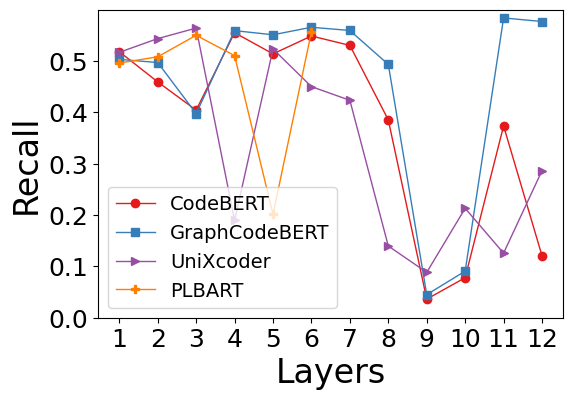

In [14]:
fig = plt.gcf()
fig.set_size_inches(6,4)
cmap = plt.get_cmap('Set1')
N = len(base) + 2

for i, model in enumerate(base):
    c_model = cmap(float(i/N))
    model_recall = per_layer_eval_dfg[model]['recall']
    keys = list(model_recall.keys())
    values = list(model_recall.values())
    for j, value in enumerate(values):
        assert model_recall[keys[j]] == value

    x = [k for k in range(1, len(keys) + 1)]
    y = [values[keys.index(str(v))] for v in x]

    ast_vals = y
    plt.ylim(0, 0.6)
    plt.yticks(ticks = np.arange(0, 0.6, 0.1))
    plt.xticks(ticks = range(1,13))
    plt.tick_params(labelsize = 18)
    plt.plot(x, y, marker = markers_base[model], markersize = 6, c = c_model,
                                linewidth=1.0, label = f'{model_names[model]}')
    
plt.legend(fontsize=14)
plt.xlabel('Layers', fontsize = 24)
plt.ylabel('Recall', fontsize = 24)
fig.savefig('results/base/rec_dfg_base.pdf', dpi=300, bbox_inches='tight') 

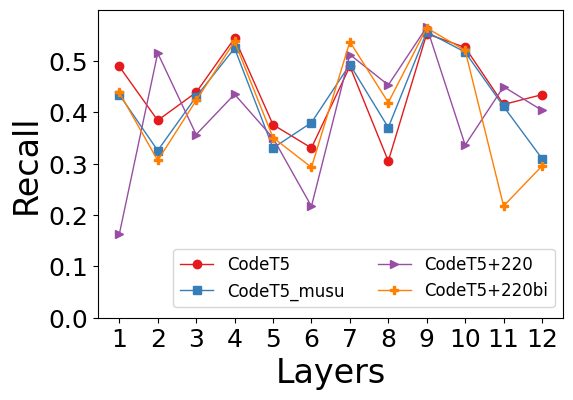

In [15]:
fig = plt.gcf()
fig.set_size_inches(6,4)
cmap = plt.get_cmap('Set1')
N = len(fine_tuned) + 2

for i, model in enumerate(fine_tuned):
    c_model = cmap(float(i/N))
    model_recall = per_layer_eval_dfg[model]['recall']
    keys = list(model_recall.keys())
    values = list(model_recall.values())
    for j, value in enumerate(values):
        assert model_recall[keys[j]] == value

    x = [k for k in range(1, len(keys) + 1)]
    y = [values[keys.index(str(v))] for v in x]

    ast_vals = y
    plt.ylim(0, 0.6)
    plt.yticks(ticks = np.arange(0, 0.6, 0.1))
    plt.xticks(ticks = range(1,13))
    plt.tick_params(labelsize = 18)
    plt.plot(x, y, marker = markers_fine[model], markersize = 6, c = c_model,
                                linewidth=1.0, label = f'{model_names[model]}')
    
plt.legend(fontsize=12, ncol = 2, bbox_to_anchor = [1., 0.25])
plt.xlabel('Layers', fontsize = 24)
plt.ylabel('Recall', fontsize = 24)
fig.savefig('results/fine_tuned/rec_dfg_fine.pdf', dpi=300, bbox_inches='tight')

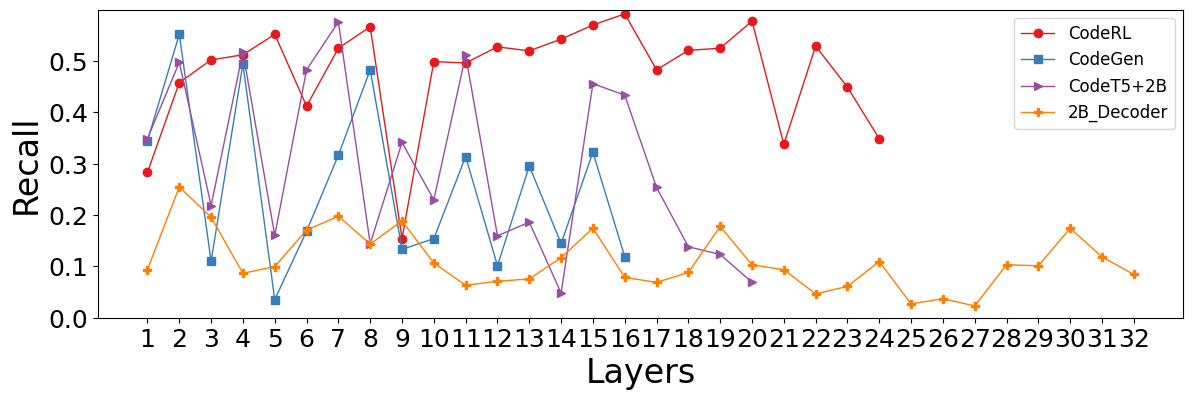

In [16]:
fig = plt.gcf()
fig.set_size_inches(14,4)
cmap = plt.get_cmap('Set1')
N = len(large) + 2

for i, model in enumerate(large):
    c_model = cmap(float(i/N))
    model_recall = per_layer_eval_dfg[model]['recall']
    keys = list(model_recall.keys())
    values = list(model_recall.values())
    for j, value in enumerate(values):
        assert model_recall[keys[j]] == value

    x = [k for k in range(1, len(keys) + 1)]
    y = [values[keys.index(str(v))] for v in x]

    ast_vals = y
    plt.ylim(0, 0.6)
    plt.yticks(ticks = np.arange(0, 0.6, 0.1))
    plt.xticks(ticks = range(1,33))
    plt.tick_params(labelsize = 18)
    plt.plot(x, y, marker = markers_large[model], markersize = 6, c = c_model,
                                linewidth=1.0, label = f'{model_names[model]}')
    
plt.legend(fontsize=12)
plt.xlabel('Layers', fontsize = 24)
plt.ylabel('Recall', fontsize = 24)
fig.savefig('results/large/rec_dfg_large.pdf', dpi=300, bbox_inches='tight')

### Similarity

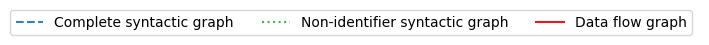

In [17]:
handles = []
cmap = plt.get_cmap('Set1')
fig = plt.gcf()
fig.set_size_inches(7,.2)
ast_patch = mlines.Line2D([], [], color = cmap(float(1/8)), linestyle = 'dashed', 
                                 label = "Complete syntactic graph")

non_id_patch = mlines.Line2D([], [], color = cmap(float(2/8)), linestyle = 'dotted', 
                                 label = "Non-identifier syntactic graph")

dfg_patch = mlines.Line2D([], [], color = cmap(float(0/8)), linestyle = 'solid', 
                                 label = "Data flow graph")

handles = handles + [ast_patch, non_id_patch, dfg_patch]
plt.legend(loc = 'right', bbox_to_anchor = (1,0.55), handles = handles, ncol=3) 
plt.axis('off')
fig.savefig('results/sim_legend.pdf', dpi = 300, bbox_inches='tight')

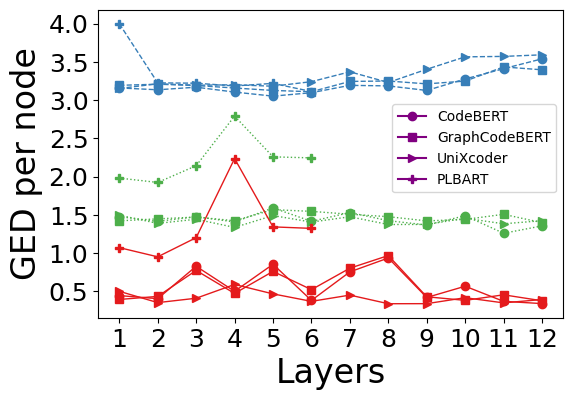

In [20]:
handles = []
thr = '0.05'
cmap = plt.get_cmap('Set1') 
num_layer = 12
fig = plt.gcf()
fig.set_size_inches(6,4)
N = len(base) + 2

plt.yticks(ticks = np.arange(0, 4.5, 0.5))
plt.xticks(ticks = range(1,num_layer+1))
plt.tick_params(labelsize = 18)

exp_dir = 'graph_comparision/similarity/exp_0/'
for i, model in enumerate(base):
    c_model = cmap(float(i/N))
    sim_dir = os.path.join(exp_dir, model)  
    model_sim = os.listdir(sim_dir)
    
    lowest_ast_sim = [0 for i in range(len(model_sim))]
    lowest_dfg_sim = [0 for i in range(len(model_sim))]
    lowest_ast_wo_id_sim = [0 for i in range(len(model_sim))]
    
    for sim in model_sim:
        layer = int(sim.split('.')[0].split('_')[1])
        sim_loc = os.path.join(sim_dir, sim)
        with open(sim_loc) as f:
            sim_data = json.load(f)
        ast_sim = sim_data['ast']
        dfg_sim = sim_data['dfg']
        ast_wo_id_sim = sim_data['ast_wo_identifiers']
        
        best_ast = min(ast_sim.items(), key = lambda x: x[1])
        best_dfg = min(dfg_sim.items(), key = lambda x: x[1])
        best_ast_wo_id = min(ast_wo_id_sim.items(), key = lambda x: x[1])
        
        lowest_ast_sim[layer] = best_ast[1]
        lowest_dfg_sim[layer] = best_dfg[1]
        lowest_ast_wo_id_sim[layer] = best_ast_wo_id[1]
        
    plt.plot(range(1, len(lowest_dfg_sim)+1), lowest_dfg_sim, marker = markers_base[model], c = cmap(float(0/8)),
               markersize = 6, linewidth=1.0, linestyle = 'solid')
        
    plt.plot(range(1, len(lowest_ast_sim)+1), lowest_ast_sim, marker = markers_base[model], c = cmap(float(1/8)),
                   markersize = 6, linewidth=1.0, linestyle = 'dashed')


    plt.plot(range(1, len(lowest_ast_wo_id_sim)+1), lowest_ast_wo_id_sim, marker = markers_base[model], c = cmap(float(2/8)),
               markersize = 6, linewidth=1.0, linestyle = 'dotted')
    
    model_patch = mlines.Line2D([], [], color = 'purple', marker = markers_base[model], 
                                 label = f'{model_names[model]}')
    handles.append(model_patch)
        
    
plt.legend(loc = 'right', bbox_to_anchor = (1,0.55), handles = handles)  

plt.xlabel('Layers', fontsize = 24)
plt.ylabel('GED per node', fontsize = 24) 

fig.savefig('results/base/sim_base.pdf', dpi=300, bbox_inches='tight') 

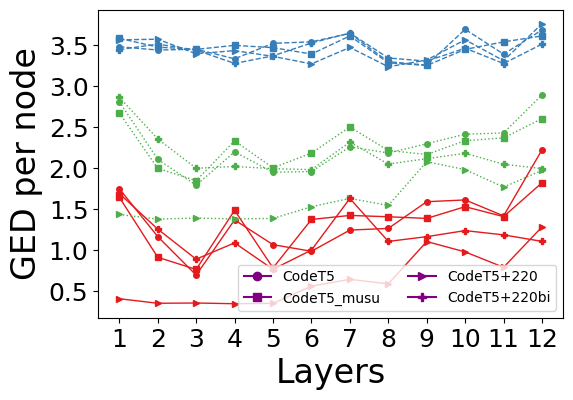

In [21]:
handles = []
thr = '0.05'
cmap = plt.get_cmap('Set1') 
num_layer = 12
fig = plt.gcf()
fig.set_size_inches(6,4)
N = len(fine_tuned) + 2

plt.yticks(ticks = np.arange(0, 4.5, 0.5))
plt.xticks(ticks = range(1,num_layer+1))
plt.tick_params(labelsize = 18)

exp_dir = 'graph_comparision/similarity/exp_0/'
for i, model in enumerate(fine_tuned):
    c_model = cmap(float(i/N))
    sim_dir = os.path.join(exp_dir, model)  
    model_sim = os.listdir(sim_dir)
    
    lowest_ast_sim = [0 for i in range(len(model_sim))]
    lowest_dfg_sim = [0 for i in range(len(model_sim))]
    lowest_ast_wo_id_sim = [0 for i in range(len(model_sim))]
    
    for sim in model_sim:
        layer = int(sim.split('.')[0].split('_')[1])
        sim_loc = os.path.join(sim_dir, sim)
        with open(sim_loc) as f:
            sim_data = json.load(f)
        ast_sim = sim_data['ast']
        dfg_sim = sim_data['dfg']
        ast_wo_id_sim = sim_data['ast_wo_identifiers']
        
        best_ast = min(ast_sim.items(), key = lambda x: x[1])
        best_dfg = min(dfg_sim.items(), key = lambda x: x[1])
        best_ast_wo_id = min(ast_wo_id_sim.items(), key = lambda x: x[1])
        
        lowest_ast_sim[layer] = best_ast[1]
        lowest_dfg_sim[layer] = best_dfg[1]
        lowest_ast_wo_id_sim[layer] = best_ast_wo_id[1]
        
    plt.plot(range(1, len(lowest_dfg_sim)+1), lowest_dfg_sim, marker = markers_fine[model], c = cmap(float(0/8)),
               markersize = 4, linewidth=1.0, label = f'{model_names[model]}_DFG', linestyle='solid')
        
    plt.plot(range(1, len(lowest_ast_sim)+1), lowest_ast_sim, marker = markers_fine[model], c = cmap(float(1/8)),
                   markersize = 4, linewidth=1.0, label = f'{model_names[model]}_AST', linestyle = 'dashed')


    plt.plot(range(1, len(lowest_ast_wo_id_sim)+1), lowest_ast_wo_id_sim, marker = markers_fine[model], c = cmap(float(2/8)),
               markersize = 4, linewidth=1.0, label = f'{model_names[model]}_non-id', linestyle = 'dotted')

    model_patch = mlines.Line2D([], [], color = 'purple', marker = markers_fine[model], 
                                 label = f'{model_names[model]}')
    handles.append(model_patch)
       
    
plt.xlabel('Layers', fontsize = 24)
plt.ylabel('GED per node', fontsize = 24)
plt.legend(loc = 4,ncol=2, handles=handles) 

fig.savefig('results/fine_tuned/sim_fine.pdf', dpi=300, bbox_inches='tight') 

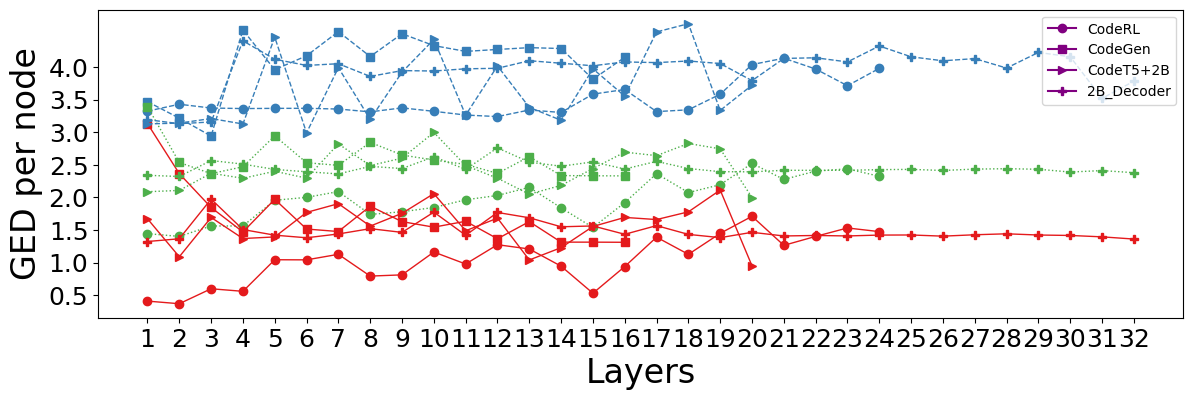

In [23]:
linestyles = [(0,(1,1)), (0,(10,3)), 'solid', (0,(3,1,1,1,1,1)), 'dashed', 'dashdot']
handles = []
large = ['coderl', 'codegen', 'codet5p_2b', 'codet5p_2b_dec']
thr = '0.05'
cmap = plt.get_cmap('Set1') 
num_layer = 32
fig = plt.gcf()
fig.set_size_inches(14,4)
N = len(large) + 2

plt.yticks(ticks = np.arange(0, 4.5, 0.5))
plt.xticks(ticks = range(1,num_layer+1))
plt.tick_params(labelsize = 18)


exp_dir = 'graph_comparision/similarity/exp_0/'
for i, model in enumerate(large):
    sim_dir = os.path.join(exp_dir, model)  
    model_sim = os.listdir(sim_dir)
    
    lowest_ast_sim = [0 for i in range(len(model_sim))]
    lowest_dfg_sim = [0 for i in range(len(model_sim))]
    lowest_ast_wo_id_sim = [0 for i in range(len(model_sim))]
    
    for sim in model_sim:
        layer = int(sim.split('.')[0].split('_')[1])
        sim_loc = os.path.join(sim_dir, sim)
        with open(sim_loc) as f:
            sim_data = json.load(f)
        ast_sim = sim_data['ast']
        dfg_sim = sim_data['dfg']
        ast_wo_id_sim = sim_data['ast_wo_identifiers']
        
        best_ast = min(ast_sim.items(), key = lambda x: x[1])
        best_dfg = min(dfg_sim.items(), key = lambda x: x[1])
        best_ast_wo_id = min(ast_wo_id_sim.items(), key = lambda x: x[1])
        
        lowest_ast_sim[layer] = best_ast[1]
        lowest_dfg_sim[layer] = best_dfg[1]
        lowest_ast_wo_id_sim[layer] = best_ast_wo_id[1]
        
    plt.plot(range(1, len(lowest_dfg_sim)+1), lowest_dfg_sim, marker = markers_large[model], c = cmap(float(0/8)),
               markersize = 6, linewidth=1.0, label = f'{model_names[model]}_DFG', linestyle = 'solid')
        
    plt.plot(range(1, len(lowest_ast_sim)+1), lowest_ast_sim, marker = markers_large[model], c = cmap(float(1/8)),
                   markersize = 6, linewidth=1.0, label = f'{model_names[model]}_AST', linestyle = 'dashed')


    plt.plot(range(1, len(lowest_ast_wo_id_sim)+1), lowest_ast_wo_id_sim, marker = markers_large[model], c = cmap(float(2/8)),
               markersize = 6, linewidth=1.0, label = f'{model_names[model]}_non-id', linestyle = 'dotted')

    model_patch = mlines.Line2D([], [], color = 'purple', marker = markers_large[model], 
                                 label = f'{model_names[model]}')
    handles.append(model_patch)   
    
plt.xlabel('Layers', fontsize = 24)
plt.ylabel('GED per node', fontsize = 24)
plt.legend(loc = 1, handles = handles) 
fig.savefig('results/large/sim_large.pdf', dpi=300, bbox_inches='tight') 

### Other attention analysis results

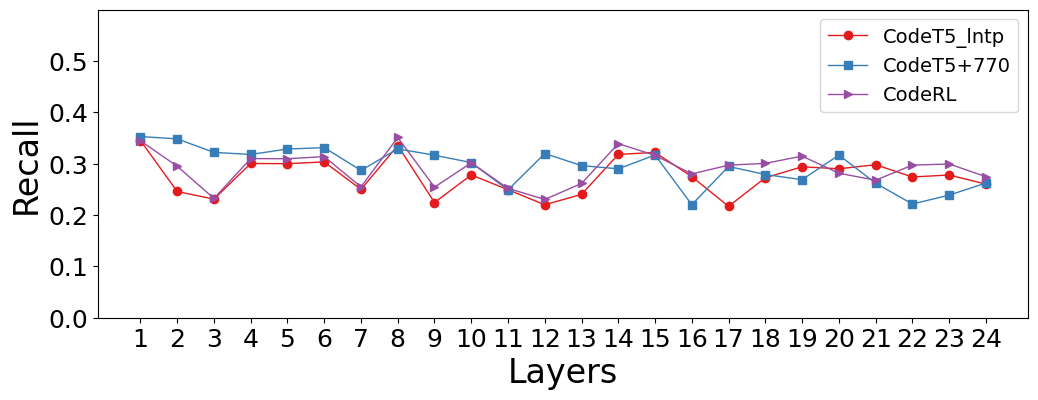

In [25]:
fig = plt.gcf()
fig.set_size_inches(12,4)
cmap = plt.get_cmap('Set1')
N = len(other) + 2

for i, model in enumerate(other):
    c_model = cmap(float(i/N))
    model_recall = per_layer_eval_ast[model]['recall']
    keys = list(model_recall.keys())
    values = list(model_recall.values())
    for j, value in enumerate(values):
        assert model_recall[keys[j]] == value

    x = [k for k in range(1, len(keys) + 1)]
    y = [values[keys.index(str(v))] for v in x]

    ast_vals = y
    plt.ylim(0, 0.6)
    plt.yticks(ticks = np.arange(0, 0.6, 0.1))
    plt.xticks(ticks = range(1,25))
    plt.tick_params(labelsize = 18)
    plt.plot(x, y, marker = markers_other[model], markersize = 6, c = c_model,
                                linewidth=1.0, label = f'{model_names[model]}')
    
plt.legend(fontsize=14)
plt.xlabel('Layers', fontsize = 24)
plt.ylabel('Recall', fontsize = 24)
fig.savefig('results/base/rec_ast_other.pdf', dpi=300, bbox_inches='tight') 

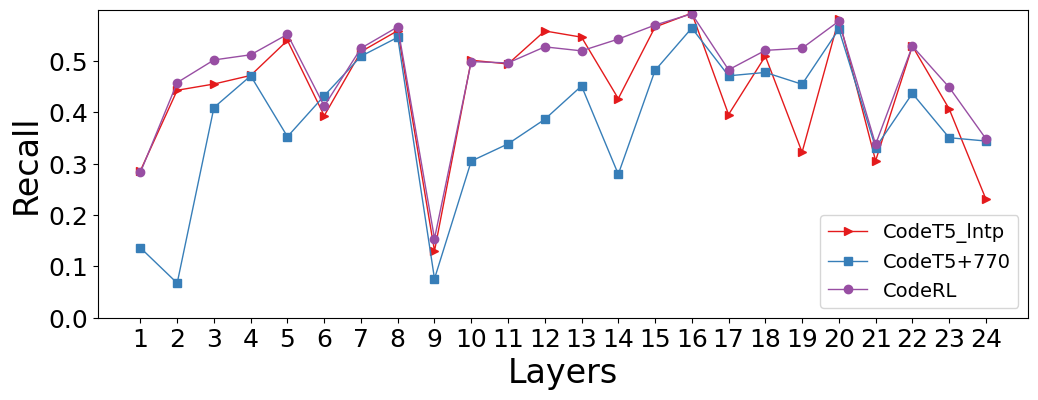

In [21]:
fig = plt.gcf()
fig.set_size_inches(12,4)
cmap = plt.get_cmap('Set1')
N = len(other) + 2

for i, model in enumerate(other):
    c_model = cmap(float(i/N))
    model_recall = per_layer_eval_dfg[model]['recall']
    keys = list(model_recall.keys())
    values = list(model_recall.values())
    for j, value in enumerate(values):
        assert model_recall[keys[j]] == value

    x = [k for k in range(1, len(keys) + 1)]
    y = [values[keys.index(str(v))] for v in x]

    ast_vals = y
    plt.ylim(0, 0.6)
    plt.yticks(ticks = np.arange(0, 0.6, 0.1))
    plt.xticks(ticks = range(1,25))
    plt.tick_params(labelsize = 18)
    plt.plot(x, y, marker = markers[model], markersize = 6, c = c_model,
                                linewidth=1.0, label = f'{model_names[model]}')
    
plt.legend(fontsize=14)
plt.xlabel('Layers', fontsize = 24)
plt.ylabel('Recall', fontsize = 24)
fig.savefig('results/base/rec_dfg_other.pdf', dpi=300, bbox_inches='tight') 

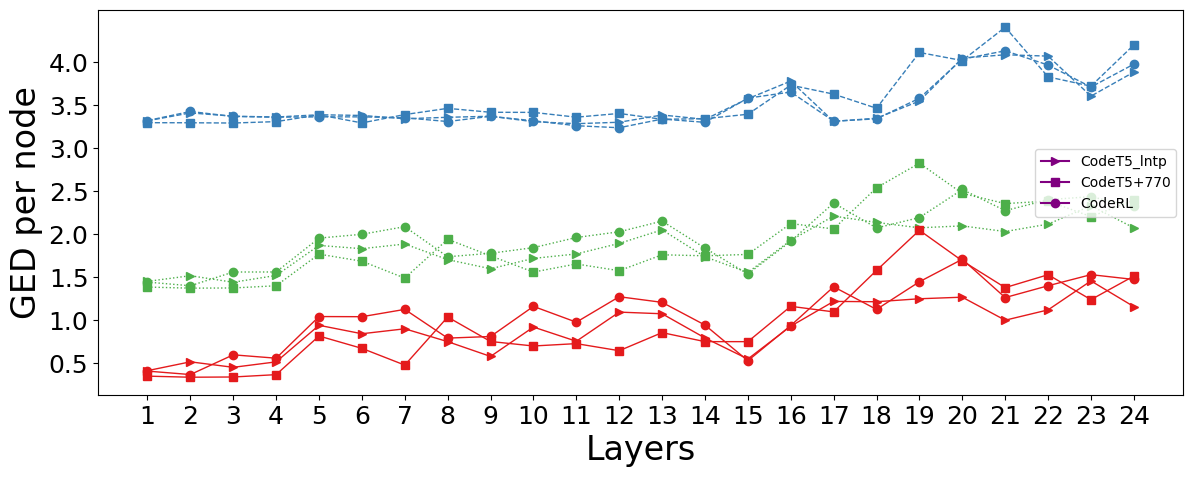

In [23]:
linestyles = [(0, (1,1)), (0,(10,3)), 'solid', (0,(3,1,1,1,1,1))]
handles = []
thr = '0.05'
cmap = plt.get_cmap('Set1') 
num_layer = 24
fig = plt.gcf()
fig.set_size_inches(14,5)
N = len(other) + 2

plt.yticks(ticks = np.arange(0, 4.5, 0.5))
plt.xticks(ticks = range(1,num_layer+1))
plt.tick_params(labelsize = 18)

exp_dir = 'graph_comparision/similarity/exp_0/'
for i, model in enumerate(other):
    c_model = cmap(float(i/N))
    sim_dir = os.path.join(exp_dir, model)  
    model_sim = os.listdir(sim_dir)
    
    lowest_ast_sim = [0 for i in range(len(model_sim))]
    lowest_dfg_sim = [0 for i in range(len(model_sim))]
    lowest_ast_wo_id_sim = [0 for i in range(len(model_sim))]
    
    for sim in model_sim:
        layer = int(sim.split('.')[0].split('_')[1])
        sim_loc = os.path.join(sim_dir, sim)
        with open(sim_loc) as f:
            sim_data = json.load(f)
        ast_sim = sim_data['ast']
        dfg_sim = sim_data['dfg']
        ast_wo_id_sim = sim_data['ast_wo_identifiers']
        
        best_ast = min(ast_sim.items(), key = lambda x: x[1])
        best_dfg = min(dfg_sim.items(), key = lambda x: x[1])
        best_ast_wo_id = min(ast_wo_id_sim.items(), key = lambda x: x[1])
        
        lowest_ast_sim[layer] = best_ast[1]
        lowest_dfg_sim[layer] = best_dfg[1]
        lowest_ast_wo_id_sim[layer] = best_ast_wo_id[1]
        
    plt.plot(range(1, len(lowest_dfg_sim)+1), lowest_dfg_sim, marker = markers[model], c = cmap(float(0/8)),
               markersize = 6, linewidth=1.0, linestyle = 'solid')
        
    plt.plot(range(1, len(lowest_ast_sim)+1), lowest_ast_sim, marker = markers[model], c = cmap(float(1/8)),
                   markersize = 6, linewidth=1.0, linestyle = 'dashed')


    plt.plot(range(1, len(lowest_ast_wo_id_sim)+1), lowest_ast_wo_id_sim, marker = markers[model], c = cmap(float(2/8)),
               markersize = 6, linewidth=1.0, linestyle = 'dotted')
    
    model_patch = mlines.Line2D([], [], color = 'purple', marker = markers[model], 
                                 label = f'{model_names[model]}')
    handles.append(model_patch)
        
    
plt.legend(loc = 'right', bbox_to_anchor = (1,0.55), handles = handles)  

plt.xlabel('Layers', fontsize = 24)
plt.ylabel('GED per node', fontsize = 24) 

fig.savefig('results/base/sim_other.pdf', dpi=300, bbox_inches='tight') 

### Precision

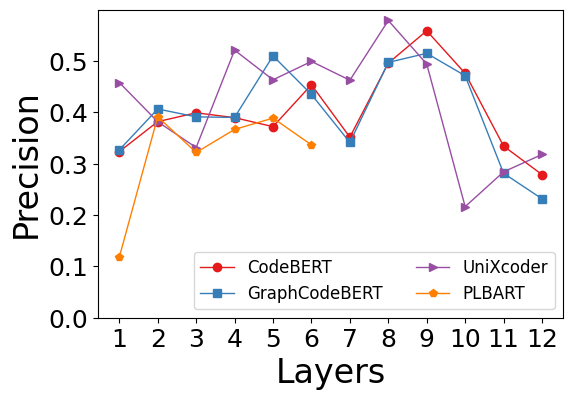

In [23]:
fig = plt.gcf()
fig.set_size_inches(6,4)
cmap = plt.get_cmap('Set1')
N = len(base) + 2

for i, model in enumerate(base):
    c_model = cmap(float(i/N))
    model_precision = per_layer_eval_ast[model]['precision']
    keys = list(model_precision.keys())
    values = list(model_precision.values())
    for j, value in enumerate(values):
        assert model_precision[keys[j]] == value

    x = [k for k in range(1, len(keys) + 1)]
    y = [values[keys.index(str(v))] for v in x]

    plt.ylim(0, 0.6)
    plt.yticks(ticks = np.arange(0, 0.6, 0.1))
    plt.xticks(ticks = range(1,13))
    plt.tick_params(labelsize = 18)
    plt.plot(x, y, marker = markers[model], markersize = 6, c = c_model,
                                linewidth=1.0, label = f'{model_names[model]}')
    
plt.legend(fontsize=12, ncol =2)
plt.xlabel('Layers', fontsize = 24)
plt.ylabel('Precision', fontsize = 24)
fig.savefig('results/base/pre_ast_base.pdf', dpi=300, bbox_inches='tight') 

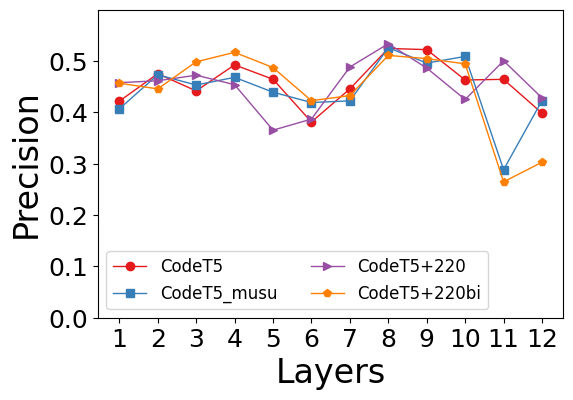

In [24]:
fig = plt.gcf()
fig.set_size_inches(6,4)
cmap = plt.get_cmap('Set1')
N = len(fine_tuned) + 2

for i, model in enumerate(fine_tuned):
    c_model = cmap(float(i/N))
    model_precision = per_layer_eval_ast[model]['precision']
    keys = list(model_precision.keys())
    values = list(model_precision.values())
    for j, value in enumerate(values):
        assert model_precision[keys[j]] == value

    x = [k for k in range(1, len(keys) + 1)]
    y = [values[keys.index(str(v))] for v in x]

    plt.ylim(0, 0.6)
    plt.yticks(ticks = np.arange(0, 0.6, 0.1))
    plt.xticks(ticks = range(1,13))
    plt.tick_params(labelsize = 18)
    plt.plot(x, y, marker = markers[model], markersize = 6, c = c_model,
                                linewidth=1.0, label = f'{model_names[model]}')
    
plt.legend(fontsize=12, ncol = 2)
plt.xlabel('Layers', fontsize = 24)
plt.ylabel('Precision', fontsize = 24)
fig.savefig('results/fine_tuned/pre_ast_fine.pdf', dpi=300, bbox_inches='tight')

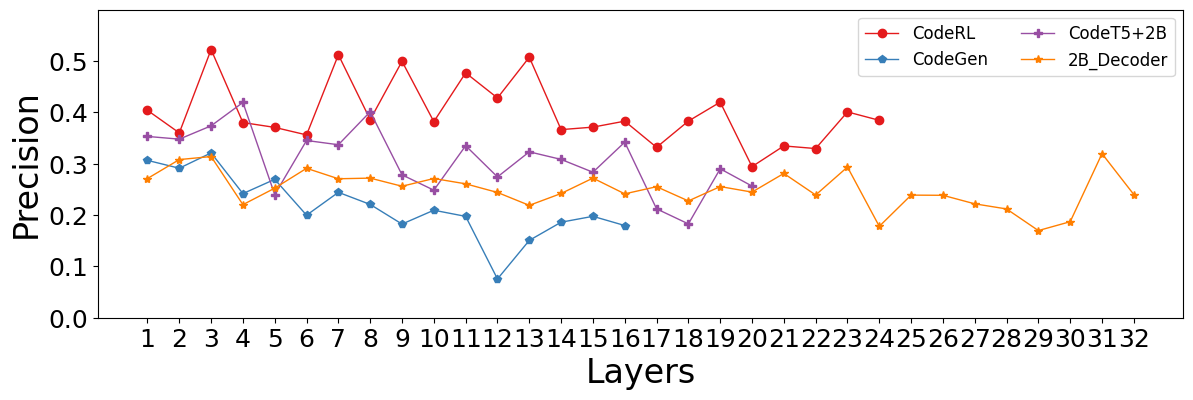

In [25]:
fig = plt.gcf()
fig.set_size_inches(14,4)
cmap = plt.get_cmap('Set1')
N = len(large) + 2

for i, model in enumerate(large):
    c_model = cmap(float(i/N))
    model_precision = per_layer_eval_ast[model]['precision']
    keys = list(model_precision.keys())
    values = list(model_precision.values())
    for j, value in enumerate(values):
        assert model_precision[keys[j]] == value

    x = [k for k in range(1, len(keys) + 1)]
    y = [values[keys.index(str(v))] for v in x]

    plt.ylim(0, 0.6)
    plt.yticks(ticks = np.arange(0, 0.6, 0.1))
    plt.xticks(ticks = range(1,33))
    plt.tick_params(labelsize = 18)
    plt.plot(x, y, marker = markers[model], markersize = 6, c = c_model,
                                linewidth=1.0, label = f'{model_names[model]}')
    
plt.legend(fontsize=12, ncol = 2)
plt.xlabel('Layers', fontsize = 24)
plt.ylabel('Precision', fontsize = 24)
fig.savefig('results/large/pre_ast_large.pdf', dpi=300, bbox_inches='tight') 

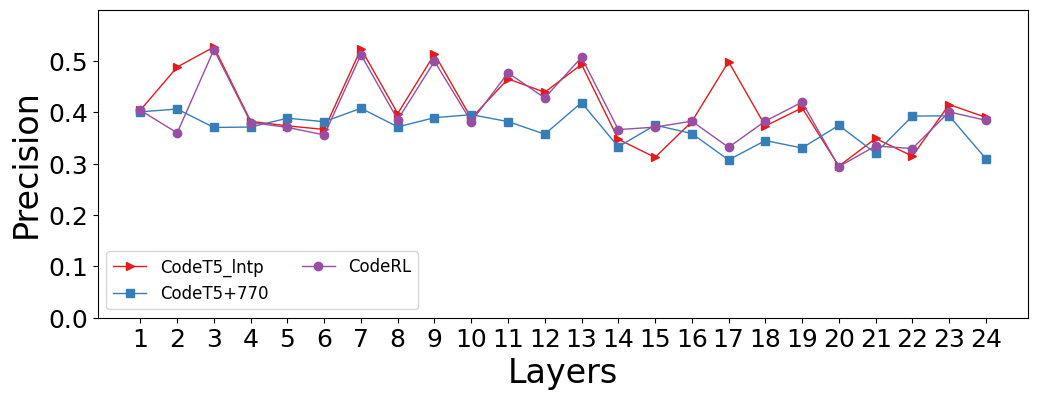

In [26]:
fig = plt.gcf()
fig.set_size_inches(12,4)
cmap = plt.get_cmap('Set1')
N = len(other) + 2

for i, model in enumerate(other):
    c_model = cmap(float(i/N))
    model_precision = per_layer_eval_ast[model]['precision']
    keys = list(model_precision.keys())
    values = list(model_precision.values())
    for j, value in enumerate(values):
        assert model_precision[keys[j]] == value

    x = [k for k in range(1, len(keys) + 1)]
    y = [values[keys.index(str(v))] for v in x]

    plt.ylim(0, 0.6)
    plt.yticks(ticks = np.arange(0, 0.6, 0.1))
    plt.xticks(ticks = range(1,25))
    plt.tick_params(labelsize = 18)
    plt.plot(x, y, marker = markers[model], markersize = 6, c = c_model,
                                linewidth=1.0, label = f'{model_names[model]}')
    
plt.legend(fontsize=12, ncol =2)
plt.xlabel('Layers', fontsize = 24)
plt.ylabel('Precision', fontsize = 24)
fig.savefig('results/base/pre_ast_other.pdf', dpi=300, bbox_inches='tight') 

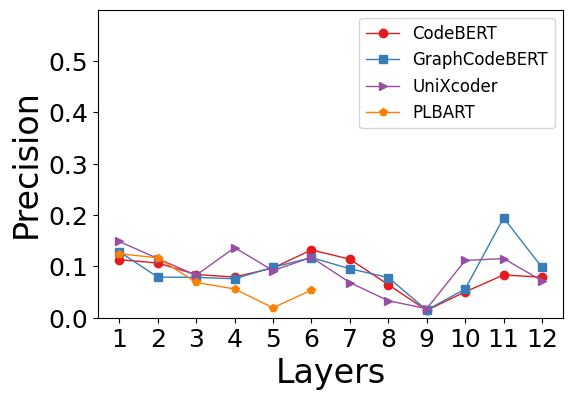

In [27]:
fig = plt.gcf()
fig.set_size_inches(6,4)
cmap = plt.get_cmap('Set1')
N = len(base) + 2

for i, model in enumerate(base):
    c_model = cmap(float(i/N))
    model_precision = per_layer_eval_dfg[model]['precision']
    keys = list(model_precision.keys())
    values = list(model_precision.values())
    for j, value in enumerate(values):
        assert model_precision[keys[j]] == value

    x = [k for k in range(1, len(keys) + 1)]
    y = [values[keys.index(str(v))] for v in x]

    plt.ylim(0, 0.6)
    plt.yticks(ticks = np.arange(0, 0.6, 0.1))
    plt.xticks(ticks = range(1,13))
    plt.tick_params(labelsize = 18)
    plt.plot(x, y, marker = markers[model], markersize = 6, c = c_model,
                                linewidth=1.0, label = f'{model_names[model]}')
    
plt.legend(fontsize=12)
plt.xlabel('Layers', fontsize = 24)
plt.ylabel('Precision', fontsize = 24)
fig.savefig('results/base/pre_dfg_base.pdf', dpi=300, bbox_inches='tight') 

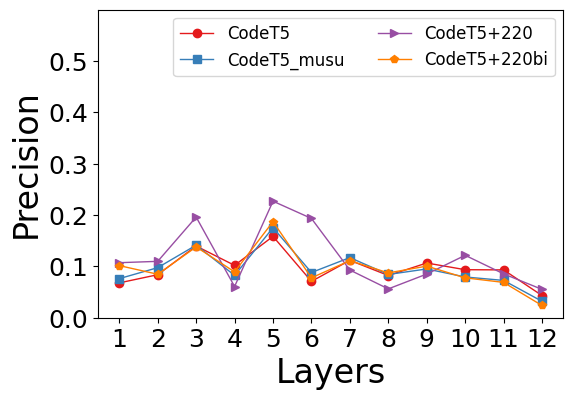

In [28]:
fig = plt.gcf()
fig.set_size_inches(6,4)
cmap = plt.get_cmap('Set1')
N = len(fine_tuned) + 2

for i, model in enumerate(fine_tuned):
    c_model = cmap(float(i/N))
    model_precision = per_layer_eval_dfg[model]['precision']
    keys = list(model_precision.keys())
    values = list(model_precision.values())
    for j, value in enumerate(values):
        assert model_precision[keys[j]] == value

    x = [k for k in range(1, len(keys) + 1)]
    y = [values[keys.index(str(v))] for v in x]

    plt.ylim(0, 0.6)
    plt.yticks(ticks = np.arange(0, 0.6, 0.1))
    plt.xticks(ticks = range(1,13))
    plt.tick_params(labelsize = 18)
    plt.plot(x, y, marker = markers[model], markersize = 6, c = c_model,
                                linewidth=1.0, label = f'{model_names[model]}')
    
plt.legend(fontsize=12, ncol=2)
plt.xlabel('Layers', fontsize = 24)
plt.ylabel('Precision', fontsize = 24)
fig.savefig('results/fine_tuned/pre_dfg_fine.pdf', dpi=300, bbox_inches='tight') 

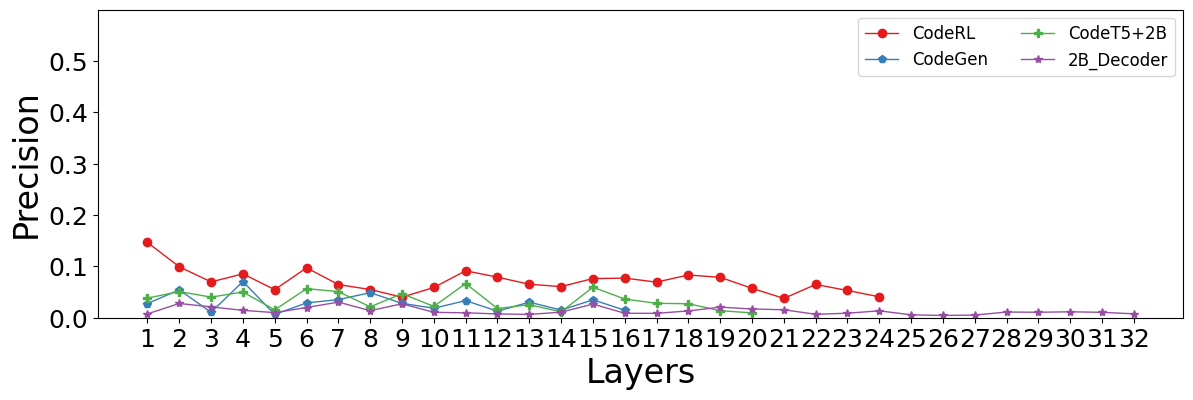

In [29]:
fig = plt.gcf()
fig.set_size_inches(14,4)
cmap = plt.get_cmap('Set1')
N = len(large) + 4

for i, model in enumerate(large):
    c_model = cmap(float(i/N))
    model_precision = per_layer_eval_dfg[model]['precision']
    keys = list(model_precision.keys())
    values = list(model_precision.values())
    for j, value in enumerate(values):
        assert model_precision[keys[j]] == value

    x = [k for k in range(1, len(keys) + 1)]
    y = [values[keys.index(str(v))] for v in x]

    plt.ylim(0, 0.6)
    plt.yticks(ticks = np.arange(0, 0.6, 0.1))
    plt.xticks(ticks = range(1,33))
    plt.tick_params(labelsize = 18)
    plt.plot(x, y, marker = markers[model], markersize = 6, c = c_model,
                                linewidth=1.0, label = f'{model_names[model]}')
    
plt.legend(fontsize=12, ncol = 2)
plt.xlabel('Layers', fontsize = 24)
plt.ylabel('Precision', fontsize = 24)
fig.savefig('results/large/pre_dfg_large.pdf', dpi=300, bbox_inches='tight')

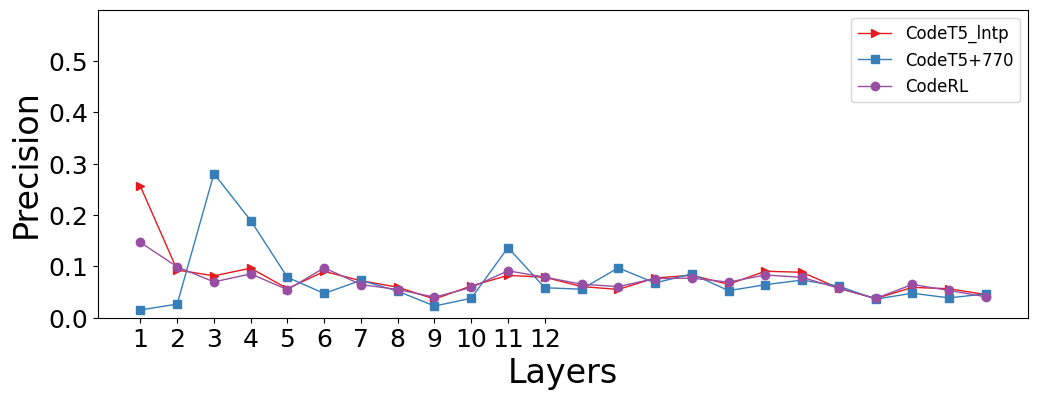

In [30]:
fig = plt.gcf()
fig.set_size_inches(12,4)
cmap = plt.get_cmap('Set1')
N = len(other) + 2

for i, model in enumerate(other):
    c_model = cmap(float(i/N))
    model_precision = per_layer_eval_dfg[model]['precision']
    keys = list(model_precision.keys())
    values = list(model_precision.values())
    for j, value in enumerate(values):
        assert model_precision[keys[j]] == value

    x = [k for k in range(1, len(keys) + 1)]
    y = [values[keys.index(str(v))] for v in x]

    plt.ylim(0, 0.6)
    plt.yticks(ticks = np.arange(0, 0.6, 0.1))
    plt.xticks(ticks = range(1,13))
    plt.tick_params(labelsize = 18)
    plt.plot(x, y, marker = markers[model], markersize = 6, c = c_model,
                                linewidth=1.0, label = f'{model_names[model]}')
    
plt.legend(fontsize=12)
plt.xlabel('Layers', fontsize = 24)
plt.ylabel('Precision', fontsize = 24)
fig.savefig('results/base/pre_dfg_other.pdf', dpi=300, bbox_inches='tight') 

### t-SNE

save the hidden representations by running `save_word_embedding.py` before running cells in this section

In [28]:
# helper functions
def get_embeddings(embeddings, corres_types, req_types):
    selected_embeddings = []
    token_types = []
    
    for i, token_type in enumerate(corres_types):
        if token_type in req_types:
            selected_embeddings.append(embeddings[i])
            token_types.append(token_type)
            
    selected_embeddings = np.asarray(selected_embeddings)
    
    return selected_embeddings, token_types

def create_df(embeddings, corres_types, perplexity = 10, n_iter = 5000, verbose = False):
    transformed = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter,
                       verbose=verbose).fit_transform(embeddings)
        
    tx = transformed[:, 0]
    ty = transformed[:, 1]
    plot_data = {
        "x" : tx,
        "y" : ty,
        "type" : corres_types
    }
    
    plot_data = pd.DataFrame(plot_data)
    
    return plot_data


def dist_matrix(embeddings_matrix):
    l, n, _ = embeddings_matrix.shape
    dist_matrix = np.ndarray((l, n, n))
    
    for layer_num in range(l):
        layer_matrix = embeddings_matrix[layer_num, :, :]
        
        for row_idx in range(n):
            h_i = layer_matrix[row_idx, :]
            
            for col_idx in range(n):
                h_j = layer_matrix[col_idx, :]
                h = h_i - h_j
                dist = np.sqrt(np.dot(h, h))
                
                dist_matrix[layer_num, row_idx, col_idx] = dist
    return dist_matrix

def create_dist_df(dist_matrix, corres_types, perplexity = 10, n_iter = 5000, verbose = False):
    tsne = tsne = TSNE(n_components=2, perplexity=perplexity, n_iter = n_iter, 
                       verbose=verbose, metric = 'precomputed', init='random')
    transformed = tsne.fit_transform(dist_matrix)
    
    tx = transformed[:, 0]
    ty = transformed[:, 1]
    plot_data = {
        "x" : tx,
        "y" : ty,
        "type" : corres_types
    }
    
    plot_data = pd.DataFrame(plot_data)
    
    return plot_data

In [29]:
info_file = 'structural_probe/exp_0/codebert.pkl'
with open(info_file, 'rb') as f:
    dist_info = pickle.load(f)

# Select codes
code_lens = []
code_nums = []
max_codes = 100
min_length = 100
for code_num, data in dist_info.items():
    code_len  = len(data['code_token_info'])
    if code_len > min_length:
        while len(code_lens) < max_codes:
            code_lens.append(code_len)
            code_nums.append(code_num)

        largest_len = max(code_lens)
        if code_len < largest_len:
            index_of_largest = code_lens.index(largest_len)
            code_lens.pop(index_of_largest)
            code_nums.pop(index_of_largest)

            code_lens.append(code_len)
            code_nums.append(code_num)

for i, num in enumerate(code_nums):
    info = dist_info[num]
    length = len(info['code_token_info'])
    assert code_lens[i] == length
print(f'max code length: {max(code_lens)} and min code length: {min(code_lens)}')

# get hidden representations
layer = 5
all_embeddings = []
corres_types = []
for code_num in code_nums:
    embeddings = dist_info[code_num]['hidden_repr'][layer].tolist()
    code_token_types = [info['type'] for info in dist_info[code_num]['code_token_info']]
    
    
    all_embeddings += embeddings
    corres_types += code_token_types


req_types = ['def', 'identifier', '(', ')', ':', 'if', 'else', ',',
            'for', 'while', 'elif', '.', 'or', 'and', '<', '>', '==', '!=', '"', '-', '+']
selected_embeddings, token_types = get_embeddings(all_embeddings, corres_types, req_types)
data = create_df(selected_embeddings, token_types, perplexity=50, n_iter=50000, verbose = 2)

max code length: 110 and min code length: 101
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8595 samples in 0.002s...
[t-SNE] Computed neighbors for 8595 samples in 0.599s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8595
[t-SNE] Computed conditional probabilities for sample 2000 / 8595
[t-SNE] Computed conditional probabilities for sample 3000 / 8595
[t-SNE] Computed conditional probabilities for sample 4000 / 8595
[t-SNE] Computed conditional probabilities for sample 5000 / 8595
[t-SNE] Computed conditional probabilities for sample 6000 / 8595
[t-SNE] Computed conditional probabilities for sample 7000 / 8595
[t-SNE] Computed conditional probabilities for sample 8000 / 8595
[t-SNE] Computed conditional probabilities for sample 8595 / 8595
[t-SNE] Mean sigma: 3.876169
[t-SNE] Computed conditional probabilities in 0.211s
[t-SNE] Iteration 50: error = 81.0986786, gradient norm = 0.0205121 (50 iterations in 0.482s)
[t-SNE] Iteration 100: error = 76.8808136,

[t-SNE] Iteration 3900: error = 1.2105448, gradient norm = 0.0004102 (50 iterations in 0.487s)
[t-SNE] Iteration 3950: error = 1.2102592, gradient norm = 0.0004138 (50 iterations in 0.484s)
[t-SNE] Iteration 4000: error = 1.2099161, gradient norm = 0.0004627 (50 iterations in 0.482s)
[t-SNE] Iteration 4050: error = 1.2095472, gradient norm = 0.0005062 (50 iterations in 0.483s)
[t-SNE] Iteration 4100: error = 1.2091635, gradient norm = 0.0005258 (50 iterations in 0.479s)
[t-SNE] Iteration 4150: error = 1.2087896, gradient norm = 0.0005492 (50 iterations in 0.480s)
[t-SNE] Iteration 4200: error = 1.2084486, gradient norm = 0.0004475 (50 iterations in 0.482s)
[t-SNE] Iteration 4250: error = 1.2080600, gradient norm = 0.0004791 (50 iterations in 0.476s)
[t-SNE] Iteration 4300: error = 1.2078375, gradient norm = 0.0004482 (50 iterations in 0.476s)
[t-SNE] Iteration 4350: error = 1.2075711, gradient norm = 0.0003854 (50 iterations in 0.479s)
[t-SNE] Iteration 4400: error = 1.2073196, gradien

[t-SNE] Iteration 8250: error = 1.1927241, gradient norm = 0.0002790 (50 iterations in 0.486s)
[t-SNE] Iteration 8300: error = 1.1925908, gradient norm = 0.0003133 (50 iterations in 0.481s)
[t-SNE] Iteration 8350: error = 1.1924663, gradient norm = 0.0002693 (50 iterations in 0.484s)
[t-SNE] Iteration 8400: error = 1.1923532, gradient norm = 0.0002718 (50 iterations in 0.485s)
[t-SNE] Iteration 8450: error = 1.1922309, gradient norm = 0.0002556 (50 iterations in 0.483s)
[t-SNE] Iteration 8500: error = 1.1921089, gradient norm = 0.0002855 (50 iterations in 0.481s)
[t-SNE] Iteration 8550: error = 1.1919872, gradient norm = 0.0002499 (50 iterations in 0.484s)
[t-SNE] Iteration 8600: error = 1.1918952, gradient norm = 0.0002415 (50 iterations in 0.479s)
[t-SNE] Iteration 8650: error = 1.1917483, gradient norm = 0.0002527 (50 iterations in 0.480s)
[t-SNE] Iteration 8700: error = 1.1916727, gradient norm = 0.0002593 (50 iterations in 0.479s)
[t-SNE] Iteration 8750: error = 1.1915772, gradien

[t-SNE] Iteration 12550: error = 1.1847699, gradient norm = 0.0002434 (50 iterations in 0.479s)
[t-SNE] Iteration 12600: error = 1.1847012, gradient norm = 0.0001938 (50 iterations in 0.502s)
[t-SNE] Iteration 12650: error = 1.1846466, gradient norm = 0.0002175 (50 iterations in 0.503s)
[t-SNE] Iteration 12700: error = 1.1845611, gradient norm = 0.0002177 (50 iterations in 0.503s)
[t-SNE] Iteration 12750: error = 1.1845218, gradient norm = 0.0002292 (50 iterations in 0.500s)
[t-SNE] Iteration 12800: error = 1.1844028, gradient norm = 0.0002303 (50 iterations in 0.476s)
[t-SNE] Iteration 12850: error = 1.1843672, gradient norm = 0.0002295 (50 iterations in 0.478s)
[t-SNE] Iteration 12900: error = 1.1842966, gradient norm = 0.0002011 (50 iterations in 0.476s)
[t-SNE] Iteration 12950: error = 1.1842285, gradient norm = 0.0002287 (50 iterations in 0.475s)
[t-SNE] Iteration 13000: error = 1.1841532, gradient norm = 0.0002181 (50 iterations in 0.479s)
[t-SNE] Iteration 13050: error = 1.18407

[t-SNE] Iteration 16850: error = 1.1798038, gradient norm = 0.0001808 (50 iterations in 0.478s)
[t-SNE] Iteration 16900: error = 1.1797624, gradient norm = 0.0001960 (50 iterations in 0.480s)
[t-SNE] Iteration 16950: error = 1.1797199, gradient norm = 0.0001875 (50 iterations in 0.482s)
[t-SNE] Iteration 17000: error = 1.1796731, gradient norm = 0.0001845 (50 iterations in 0.482s)
[t-SNE] Iteration 17050: error = 1.1796006, gradient norm = 0.0002039 (50 iterations in 0.478s)
[t-SNE] Iteration 17100: error = 1.1795228, gradient norm = 0.0002034 (50 iterations in 0.481s)
[t-SNE] Iteration 17150: error = 1.1795069, gradient norm = 0.0001639 (50 iterations in 0.485s)
[t-SNE] Iteration 17200: error = 1.1794556, gradient norm = 0.0001511 (50 iterations in 0.482s)
[t-SNE] Iteration 17250: error = 1.1794368, gradient norm = 0.0001773 (50 iterations in 0.478s)
[t-SNE] Iteration 17300: error = 1.1794200, gradient norm = 0.0002028 (50 iterations in 0.478s)
[t-SNE] Iteration 17350: error = 1.17937

[t-SNE] Iteration 21150: error = 1.1760026, gradient norm = 0.0001479 (50 iterations in 0.479s)
[t-SNE] Iteration 21200: error = 1.1759790, gradient norm = 0.0001572 (50 iterations in 0.496s)
[t-SNE] Iteration 21250: error = 1.1759915, gradient norm = 0.0001780 (50 iterations in 0.483s)
[t-SNE] Iteration 21300: error = 1.1759441, gradient norm = 0.0001866 (50 iterations in 0.481s)
[t-SNE] Iteration 21350: error = 1.1759533, gradient norm = 0.0001794 (50 iterations in 0.482s)
[t-SNE] Iteration 21400: error = 1.1759441, gradient norm = 0.0001698 (50 iterations in 0.480s)
[t-SNE] Iteration 21450: error = 1.1759120, gradient norm = 0.0001519 (50 iterations in 0.479s)
[t-SNE] Iteration 21500: error = 1.1759475, gradient norm = 0.0001450 (50 iterations in 0.480s)
[t-SNE] Iteration 21550: error = 1.1758966, gradient norm = 0.0001717 (50 iterations in 0.479s)
[t-SNE] Iteration 21600: error = 1.1758751, gradient norm = 0.0001435 (50 iterations in 0.472s)
[t-SNE] Iteration 21650: error = 1.17583

[t-SNE] Iteration 25450: error = 1.1741331, gradient norm = 0.0001561 (50 iterations in 0.470s)
[t-SNE] Iteration 25500: error = 1.1741053, gradient norm = 0.0001651 (50 iterations in 0.475s)
[t-SNE] Iteration 25550: error = 1.1740948, gradient norm = 0.0001439 (50 iterations in 0.470s)
[t-SNE] Iteration 25600: error = 1.1740673, gradient norm = 0.0001606 (50 iterations in 0.460s)
[t-SNE] Iteration 25650: error = 1.1740272, gradient norm = 0.0001423 (50 iterations in 0.469s)
[t-SNE] Iteration 25700: error = 1.1740233, gradient norm = 0.0001420 (50 iterations in 0.468s)
[t-SNE] Iteration 25750: error = 1.1739409, gradient norm = 0.0001376 (50 iterations in 0.473s)
[t-SNE] Iteration 25800: error = 1.1739213, gradient norm = 0.0001554 (50 iterations in 0.473s)
[t-SNE] Iteration 25850: error = 1.1739228, gradient norm = 0.0001518 (50 iterations in 0.502s)
[t-SNE] Iteration 25900: error = 1.1738790, gradient norm = 0.0001431 (50 iterations in 0.494s)
[t-SNE] Iteration 25950: error = 1.17387

[t-SNE] Iteration 29750: error = 1.1721210, gradient norm = 0.0001315 (50 iterations in 0.479s)
[t-SNE] Iteration 29800: error = 1.1720933, gradient norm = 0.0001412 (50 iterations in 0.478s)
[t-SNE] Iteration 29850: error = 1.1720703, gradient norm = 0.0001684 (50 iterations in 0.479s)
[t-SNE] Iteration 29900: error = 1.1720455, gradient norm = 0.0001255 (50 iterations in 0.478s)
[t-SNE] Iteration 29950: error = 1.1720248, gradient norm = 0.0001607 (50 iterations in 0.478s)
[t-SNE] Iteration 30000: error = 1.1719882, gradient norm = 0.0001203 (50 iterations in 0.478s)
[t-SNE] Iteration 30050: error = 1.1719667, gradient norm = 0.0001567 (50 iterations in 0.479s)
[t-SNE] Iteration 30100: error = 1.1719426, gradient norm = 0.0001572 (50 iterations in 0.479s)
[t-SNE] Iteration 30150: error = 1.1719403, gradient norm = 0.0001424 (50 iterations in 0.480s)
[t-SNE] Iteration 30200: error = 1.1719166, gradient norm = 0.0001686 (50 iterations in 0.477s)
[t-SNE] Iteration 30250: error = 1.17184

[t-SNE] Iteration 34050: error = 1.1704907, gradient norm = 0.0000968 (50 iterations in 0.475s)
[t-SNE] Iteration 34100: error = 1.1704929, gradient norm = 0.0000923 (50 iterations in 0.476s)
[t-SNE] Iteration 34150: error = 1.1704924, gradient norm = 0.0001048 (50 iterations in 0.482s)
[t-SNE] Iteration 34200: error = 1.1704681, gradient norm = 0.0001045 (50 iterations in 0.478s)
[t-SNE] Iteration 34250: error = 1.1704801, gradient norm = 0.0001127 (50 iterations in 0.478s)
[t-SNE] Iteration 34300: error = 1.1704577, gradient norm = 0.0001136 (50 iterations in 0.478s)
[t-SNE] Iteration 34350: error = 1.1704427, gradient norm = 0.0001075 (50 iterations in 0.479s)
[t-SNE] Iteration 34400: error = 1.1704544, gradient norm = 0.0002035 (50 iterations in 0.478s)
[t-SNE] Iteration 34450: error = 1.1704326, gradient norm = 0.0001230 (50 iterations in 0.478s)
[t-SNE] Iteration 34500: error = 1.1704336, gradient norm = 0.0001270 (50 iterations in 0.478s)
[t-SNE] Iteration 34550: error = 1.17038

[t-SNE] Iteration 38350: error = 1.1691514, gradient norm = 0.0001167 (50 iterations in 0.478s)
[t-SNE] Iteration 38400: error = 1.1691265, gradient norm = 0.0001330 (50 iterations in 0.500s)
[t-SNE] Iteration 38450: error = 1.1691328, gradient norm = 0.0001450 (50 iterations in 0.478s)
[t-SNE] Iteration 38500: error = 1.1691083, gradient norm = 0.0001127 (50 iterations in 0.483s)
[t-SNE] Iteration 38550: error = 1.1691217, gradient norm = 0.0001170 (50 iterations in 0.478s)
[t-SNE] Iteration 38600: error = 1.1690912, gradient norm = 0.0001096 (50 iterations in 0.478s)
[t-SNE] Iteration 38650: error = 1.1690668, gradient norm = 0.0001365 (50 iterations in 0.478s)
[t-SNE] Iteration 38700: error = 1.1690722, gradient norm = 0.0001873 (50 iterations in 0.460s)
[t-SNE] Iteration 38750: error = 1.1690602, gradient norm = 0.0001226 (50 iterations in 0.477s)
[t-SNE] Iteration 38800: error = 1.1690369, gradient norm = 0.0001235 (50 iterations in 0.478s)
[t-SNE] Iteration 38850: error = 1.16901

[t-SNE] Iteration 42650: error = 1.1680399, gradient norm = 0.0000984 (50 iterations in 0.480s)
[t-SNE] Iteration 42700: error = 1.1680272, gradient norm = 0.0001137 (50 iterations in 0.480s)
[t-SNE] Iteration 42750: error = 1.1680342, gradient norm = 0.0000906 (50 iterations in 0.478s)
[t-SNE] Iteration 42800: error = 1.1680260, gradient norm = 0.0000932 (50 iterations in 0.479s)
[t-SNE] Iteration 42850: error = 1.1680053, gradient norm = 0.0001155 (50 iterations in 0.481s)
[t-SNE] Iteration 42900: error = 1.1680046, gradient norm = 0.0000840 (50 iterations in 0.479s)
[t-SNE] Iteration 42950: error = 1.1679901, gradient norm = 0.0000936 (50 iterations in 0.482s)
[t-SNE] Iteration 43000: error = 1.1679969, gradient norm = 0.0001082 (50 iterations in 0.482s)
[t-SNE] Iteration 43050: error = 1.1679760, gradient norm = 0.0001031 (50 iterations in 0.482s)
[t-SNE] Iteration 43100: error = 1.1679816, gradient norm = 0.0000884 (50 iterations in 0.477s)
[t-SNE] Iteration 43150: error = 1.16797

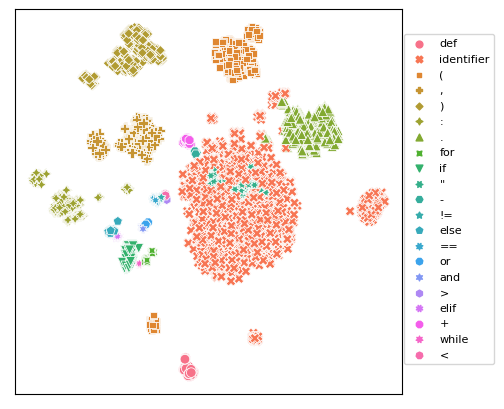

In [30]:
fig = plt.gcf()
fig.set_size_inches(5,5)
c = sns.color_palette("icefire", as_cmap=True)
sp = sns.scatterplot(data = data, x = 'x', y = 'y', hue = 'type', style = 'type', s=48)
handles, labels = sp.get_legend_handles_labels()
sp.legend_.remove()
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')

for h in handles:
    h._sizes = [24]
fig.legend(handles, labels, loc='right', bbox_to_anchor=(1.095, .5), title='', fontsize=8)
fig.savefig('results/tsne_hidden_cb_5.pdf', dpi=300, bbox_inches='tight')

In [31]:
info_file = 'structural_probe/exp_0/codebert.pkl'
with open(info_file, 'rb') as f:
    dist_info = pickle.load(f)

# Select codes
code_lens = []
code_nums = []
max_codes = 100
min_length = 100
for code_num, data in dist_info.items():
    code_len  = len(data['code_token_info'])
    if code_len > min_length:
        while len(code_lens) < max_codes:
            code_lens.append(code_len)
            code_nums.append(code_num)

        largest_len = max(code_lens)
        if code_len < largest_len:
            index_of_largest = code_lens.index(largest_len)
            code_lens.pop(index_of_largest)
            code_nums.pop(index_of_largest)

            code_lens.append(code_len)
            code_nums.append(code_num)

for i, num in enumerate(code_nums):
    info = dist_info[num]
    length = len(info['code_token_info'])
    assert code_lens[i] == length
print(f'max code length: {max(code_lens)} and min code length: {min(code_lens)}')

# get hidden representations
layer = -1
all_embeddings = []
corres_types = []
for code_num in code_nums:
    embeddings = dist_info[code_num]['hidden_repr'][layer].tolist()
    code_token_types = [info['type'] for info in dist_info[code_num]['code_token_info']]
    
    
    all_embeddings += embeddings
    corres_types += code_token_types


req_types = ['def', 'identifier', '(', ')', ':', 'if', 'else', ',',
            'for', 'while', 'elif', '.', 'or', 'and', '<', '>', '==', '!=', '"', '-', '+']
selected_embeddings, token_types = get_embeddings(all_embeddings, corres_types, req_types)
data = create_df(selected_embeddings, token_types, perplexity=50, n_iter=50000, verbose = 2)

max code length: 110 and min code length: 101
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8595 samples in 0.002s...
[t-SNE] Computed neighbors for 8595 samples in 0.333s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8595
[t-SNE] Computed conditional probabilities for sample 2000 / 8595
[t-SNE] Computed conditional probabilities for sample 3000 / 8595
[t-SNE] Computed conditional probabilities for sample 4000 / 8595
[t-SNE] Computed conditional probabilities for sample 5000 / 8595
[t-SNE] Computed conditional probabilities for sample 6000 / 8595
[t-SNE] Computed conditional probabilities for sample 7000 / 8595
[t-SNE] Computed conditional probabilities for sample 8000 / 8595
[t-SNE] Computed conditional probabilities for sample 8595 / 8595
[t-SNE] Mean sigma: 3.329329
[t-SNE] Computed conditional probabilities in 0.210s
[t-SNE] Iteration 50: error = 78.8873291, gradient norm = 0.0182148 (50 iterations in 0.550s)
[t-SNE] Iteration 100: error = 74.7076721,

[t-SNE] Iteration 3900: error = 1.2231920, gradient norm = 0.0006226 (50 iterations in 0.548s)
[t-SNE] Iteration 3950: error = 1.2226791, gradient norm = 0.0006889 (50 iterations in 0.546s)
[t-SNE] Iteration 4000: error = 1.2221406, gradient norm = 0.0006959 (50 iterations in 0.539s)
[t-SNE] Iteration 4050: error = 1.2216632, gradient norm = 0.0006458 (50 iterations in 0.542s)
[t-SNE] Iteration 4100: error = 1.2212067, gradient norm = 0.0006393 (50 iterations in 0.548s)
[t-SNE] Iteration 4150: error = 1.2207904, gradient norm = 0.0005620 (50 iterations in 0.553s)
[t-SNE] Iteration 4200: error = 1.2204386, gradient norm = 0.0005136 (50 iterations in 0.535s)
[t-SNE] Iteration 4250: error = 1.2200273, gradient norm = 0.0005814 (50 iterations in 0.545s)
[t-SNE] Iteration 4300: error = 1.2195704, gradient norm = 0.0006116 (50 iterations in 0.548s)
[t-SNE] Iteration 4350: error = 1.2191423, gradient norm = 0.0005562 (50 iterations in 0.539s)
[t-SNE] Iteration 4400: error = 1.2187638, gradien

[t-SNE] Iteration 8250: error = 1.2032467, gradient norm = 0.0003414 (50 iterations in 0.552s)
[t-SNE] Iteration 8300: error = 1.2030964, gradient norm = 0.0003644 (50 iterations in 0.552s)
[t-SNE] Iteration 8350: error = 1.2029240, gradient norm = 0.0003796 (50 iterations in 0.552s)
[t-SNE] Iteration 8400: error = 1.2027488, gradient norm = 0.0003889 (50 iterations in 0.539s)
[t-SNE] Iteration 8450: error = 1.2025863, gradient norm = 0.0004146 (50 iterations in 0.551s)
[t-SNE] Iteration 8500: error = 1.2023547, gradient norm = 0.0004416 (50 iterations in 0.548s)
[t-SNE] Iteration 8550: error = 1.2021430, gradient norm = 0.0004537 (50 iterations in 0.544s)
[t-SNE] Iteration 8600: error = 1.2019659, gradient norm = 0.0003030 (50 iterations in 0.544s)
[t-SNE] Iteration 8650: error = 1.2018491, gradient norm = 0.0003183 (50 iterations in 0.550s)
[t-SNE] Iteration 8700: error = 1.2016821, gradient norm = 0.0002960 (50 iterations in 0.551s)
[t-SNE] Iteration 8750: error = 1.2015433, gradien

[t-SNE] Iteration 12550: error = 1.1927950, gradient norm = 0.0002738 (50 iterations in 0.546s)
[t-SNE] Iteration 12600: error = 1.1927302, gradient norm = 0.0002447 (50 iterations in 0.551s)
[t-SNE] Iteration 12650: error = 1.1926494, gradient norm = 0.0002560 (50 iterations in 0.551s)
[t-SNE] Iteration 12700: error = 1.1925505, gradient norm = 0.0002359 (50 iterations in 0.551s)
[t-SNE] Iteration 12750: error = 1.1924838, gradient norm = 0.0002428 (50 iterations in 0.536s)
[t-SNE] Iteration 12800: error = 1.1924320, gradient norm = 0.0002322 (50 iterations in 0.552s)
[t-SNE] Iteration 12850: error = 1.1923214, gradient norm = 0.0002593 (50 iterations in 0.552s)
[t-SNE] Iteration 12900: error = 1.1922238, gradient norm = 0.0002586 (50 iterations in 0.541s)
[t-SNE] Iteration 12950: error = 1.1921377, gradient norm = 0.0002669 (50 iterations in 0.550s)
[t-SNE] Iteration 13000: error = 1.1920778, gradient norm = 0.0002206 (50 iterations in 0.522s)
[t-SNE] Iteration 13050: error = 1.19201

[t-SNE] Iteration 16850: error = 1.1866736, gradient norm = 0.0002052 (50 iterations in 0.552s)
[t-SNE] Iteration 16900: error = 1.1866188, gradient norm = 0.0002121 (50 iterations in 0.542s)
[t-SNE] Iteration 16950: error = 1.1865535, gradient norm = 0.0002529 (50 iterations in 0.551s)
[t-SNE] Iteration 17000: error = 1.1865230, gradient norm = 0.0002580 (50 iterations in 0.560s)
[t-SNE] Iteration 17050: error = 1.1864749, gradient norm = 0.0002011 (50 iterations in 0.552s)
[t-SNE] Iteration 17100: error = 1.1864196, gradient norm = 0.0002421 (50 iterations in 0.555s)
[t-SNE] Iteration 17150: error = 1.1863754, gradient norm = 0.0002109 (50 iterations in 0.551s)
[t-SNE] Iteration 17200: error = 1.1863066, gradient norm = 0.0001977 (50 iterations in 0.552s)
[t-SNE] Iteration 17250: error = 1.1862258, gradient norm = 0.0002085 (50 iterations in 0.552s)
[t-SNE] Iteration 17300: error = 1.1861699, gradient norm = 0.0002381 (50 iterations in 0.548s)
[t-SNE] Iteration 17350: error = 1.18613

[t-SNE] Iteration 21150: error = 1.1823955, gradient norm = 0.0001842 (50 iterations in 0.544s)
[t-SNE] Iteration 21200: error = 1.1823435, gradient norm = 0.0001734 (50 iterations in 0.549s)
[t-SNE] Iteration 21250: error = 1.1822970, gradient norm = 0.0002326 (50 iterations in 0.548s)
[t-SNE] Iteration 21300: error = 1.1822739, gradient norm = 0.0001949 (50 iterations in 0.536s)
[t-SNE] Iteration 21350: error = 1.1822135, gradient norm = 0.0001650 (50 iterations in 0.551s)
[t-SNE] Iteration 21400: error = 1.1821960, gradient norm = 0.0001485 (50 iterations in 0.546s)
[t-SNE] Iteration 21450: error = 1.1821519, gradient norm = 0.0001789 (50 iterations in 0.550s)
[t-SNE] Iteration 21500: error = 1.1821296, gradient norm = 0.0001973 (50 iterations in 0.539s)
[t-SNE] Iteration 21550: error = 1.1820896, gradient norm = 0.0001859 (50 iterations in 0.551s)
[t-SNE] Iteration 21600: error = 1.1820611, gradient norm = 0.0001953 (50 iterations in 0.552s)
[t-SNE] Iteration 21650: error = 1.18204

[t-SNE] Iteration 25450: error = 1.1793259, gradient norm = 0.0001671 (50 iterations in 0.548s)
[t-SNE] Iteration 25500: error = 1.1792953, gradient norm = 0.0001798 (50 iterations in 0.543s)
[t-SNE] Iteration 25550: error = 1.1792274, gradient norm = 0.0002004 (50 iterations in 0.541s)
[t-SNE] Iteration 25600: error = 1.1792289, gradient norm = 0.0001927 (50 iterations in 0.543s)
[t-SNE] Iteration 25650: error = 1.1791891, gradient norm = 0.0001914 (50 iterations in 0.549s)
[t-SNE] Iteration 25700: error = 1.1791682, gradient norm = 0.0001745 (50 iterations in 0.544s)
[t-SNE] Iteration 25750: error = 1.1791102, gradient norm = 0.0001704 (50 iterations in 0.551s)
[t-SNE] Iteration 25800: error = 1.1791006, gradient norm = 0.0001561 (50 iterations in 0.537s)
[t-SNE] Iteration 25850: error = 1.1790712, gradient norm = 0.0001729 (50 iterations in 0.534s)
[t-SNE] Iteration 25900: error = 1.1790612, gradient norm = 0.0001656 (50 iterations in 0.534s)
[t-SNE] Iteration 25950: error = 1.17900

[t-SNE] Iteration 29750: error = 1.1769823, gradient norm = 0.0001464 (50 iterations in 0.528s)
[t-SNE] Iteration 29800: error = 1.1769533, gradient norm = 0.0001396 (50 iterations in 0.525s)
[t-SNE] Iteration 29850: error = 1.1769530, gradient norm = 0.0001503 (50 iterations in 0.529s)
[t-SNE] Iteration 29900: error = 1.1769284, gradient norm = 0.0001179 (50 iterations in 0.533s)
[t-SNE] Iteration 29950: error = 1.1769166, gradient norm = 0.0001404 (50 iterations in 0.529s)
[t-SNE] Iteration 30000: error = 1.1768897, gradient norm = 0.0001293 (50 iterations in 0.527s)
[t-SNE] Iteration 30050: error = 1.1768466, gradient norm = 0.0001270 (50 iterations in 0.533s)
[t-SNE] Iteration 30100: error = 1.1768090, gradient norm = 0.0001192 (50 iterations in 0.532s)
[t-SNE] Iteration 30150: error = 1.1767920, gradient norm = 0.0001440 (50 iterations in 0.531s)
[t-SNE] Iteration 30200: error = 1.1767706, gradient norm = 0.0001386 (50 iterations in 0.525s)
[t-SNE] Iteration 30250: error = 1.17676

[t-SNE] Iteration 34050: error = 1.1751025, gradient norm = 0.0001572 (50 iterations in 0.527s)
[t-SNE] Iteration 34100: error = 1.1750848, gradient norm = 0.0001476 (50 iterations in 0.503s)
[t-SNE] Iteration 34150: error = 1.1750600, gradient norm = 0.0001527 (50 iterations in 0.531s)
[t-SNE] Iteration 34200: error = 1.1750244, gradient norm = 0.0001606 (50 iterations in 0.529s)
[t-SNE] Iteration 34250: error = 1.1750034, gradient norm = 0.0001422 (50 iterations in 0.524s)
[t-SNE] Iteration 34300: error = 1.1749902, gradient norm = 0.0001510 (50 iterations in 0.521s)
[t-SNE] Iteration 34350: error = 1.1749868, gradient norm = 0.0001599 (50 iterations in 0.529s)
[t-SNE] Iteration 34400: error = 1.1749495, gradient norm = 0.0001690 (50 iterations in 0.525s)
[t-SNE] Iteration 34450: error = 1.1749451, gradient norm = 0.0001650 (50 iterations in 0.534s)
[t-SNE] Iteration 34500: error = 1.1749206, gradient norm = 0.0001596 (50 iterations in 0.527s)
[t-SNE] Iteration 34550: error = 1.17489

[t-SNE] Iteration 38350: error = 1.1735731, gradient norm = 0.0001339 (50 iterations in 0.524s)
[t-SNE] Iteration 38400: error = 1.1735352, gradient norm = 0.0001417 (50 iterations in 0.530s)
[t-SNE] Iteration 38450: error = 1.1735125, gradient norm = 0.0001794 (50 iterations in 0.529s)
[t-SNE] Iteration 38500: error = 1.1734844, gradient norm = 0.0001511 (50 iterations in 0.531s)
[t-SNE] Iteration 38550: error = 1.1734641, gradient norm = 0.0001813 (50 iterations in 0.523s)
[t-SNE] Iteration 38600: error = 1.1734209, gradient norm = 0.0002084 (50 iterations in 0.532s)
[t-SNE] Iteration 38650: error = 1.1733928, gradient norm = 0.0001700 (50 iterations in 0.536s)
[t-SNE] Iteration 38700: error = 1.1734135, gradient norm = 0.0001701 (50 iterations in 0.525s)
[t-SNE] Iteration 38750: error = 1.1733902, gradient norm = 0.0001425 (50 iterations in 0.536s)
[t-SNE] Iteration 38800: error = 1.1734130, gradient norm = 0.0001531 (50 iterations in 0.532s)
[t-SNE] Iteration 38850: error = 1.17339

[t-SNE] Iteration 42650: error = 1.1722207, gradient norm = 0.0001554 (50 iterations in 0.532s)
[t-SNE] Iteration 42700: error = 1.1721680, gradient norm = 0.0001771 (50 iterations in 0.521s)
[t-SNE] Iteration 42750: error = 1.1721511, gradient norm = 0.0001686 (50 iterations in 0.525s)
[t-SNE] Iteration 42800: error = 1.1721332, gradient norm = 0.0001132 (50 iterations in 0.532s)
[t-SNE] Iteration 42850: error = 1.1721354, gradient norm = 0.0001286 (50 iterations in 0.520s)
[t-SNE] Iteration 42900: error = 1.1721226, gradient norm = 0.0001377 (50 iterations in 0.526s)
[t-SNE] Iteration 42950: error = 1.1721355, gradient norm = 0.0001247 (50 iterations in 0.519s)
[t-SNE] Iteration 43000: error = 1.1721348, gradient norm = 0.0001526 (50 iterations in 0.532s)
[t-SNE] Iteration 43050: error = 1.1721184, gradient norm = 0.0001414 (50 iterations in 0.531s)
[t-SNE] Iteration 43100: error = 1.1720891, gradient norm = 0.0001417 (50 iterations in 0.530s)
[t-SNE] Iteration 43150: error = 1.17204

[t-SNE] Iteration 46950: error = 1.1708717, gradient norm = 0.0001478 (50 iterations in 0.522s)
[t-SNE] Iteration 47000: error = 1.1708831, gradient norm = 0.0001381 (50 iterations in 0.528s)
[t-SNE] Iteration 47050: error = 1.1708481, gradient norm = 0.0001308 (50 iterations in 0.524s)
[t-SNE] Iteration 47100: error = 1.1708422, gradient norm = 0.0001294 (50 iterations in 0.524s)
[t-SNE] Iteration 47150: error = 1.1708335, gradient norm = 0.0001123 (50 iterations in 0.522s)
[t-SNE] Iteration 47200: error = 1.1708264, gradient norm = 0.0001060 (50 iterations in 0.532s)
[t-SNE] Iteration 47250: error = 1.1708479, gradient norm = 0.0001233 (50 iterations in 0.527s)
[t-SNE] Iteration 47300: error = 1.1708289, gradient norm = 0.0001303 (50 iterations in 0.527s)
[t-SNE] Iteration 47350: error = 1.1707997, gradient norm = 0.0001285 (50 iterations in 0.526s)
[t-SNE] Iteration 47400: error = 1.1707864, gradient norm = 0.0001101 (50 iterations in 0.530s)
[t-SNE] Iteration 47450: error = 1.17078

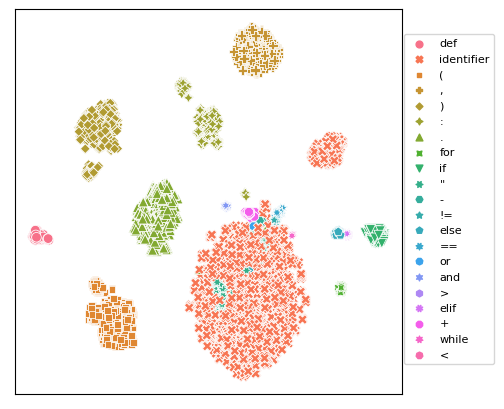

In [32]:
fig = plt.gcf()
fig.set_size_inches(5,5)
c = sns.color_palette("icefire", as_cmap=True)
sp = sns.scatterplot(data = data, x = 'x', y = 'y', hue = 'type', style = 'type', s=48)
handles, labels = sp.get_legend_handles_labels()
sp.legend_.remove()
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')

for h in handles:
    h._sizes = [24]
fig.legend(handles, labels, loc='right', bbox_to_anchor=(1.095, .5), title='', fontsize=8)
fig.savefig('results/tsne_hidden_cb_12.pdf', dpi=300, bbox_inches='tight')

In [33]:
data_file = 'structural_probe/exp_0/codebert.pkl'
with open(data_file, 'rb') as f:
    all_data = pickle.load(f)

data = all_data[1614]
tree_dist = data['tree_dist']
code_tokens = data['code_token_info']
corres_types = [info['type'] for info in code_tokens]

hidden_repr = data['hidden_repr']
model_dist = dist_matrix(hidden_repr)
model_dist_l5 = model_dist[5]

ast_df = create_dist_df(tree_dist, corres_types, perplexity=5, n_iter=50000, verbose=2)
model_df = create_df(model_dist_l5, corres_types, perplexity=5, n_iter=50000, verbose=2)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 145 samples in 0.000s...
[t-SNE] Computed neighbors for 145 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 145 / 145
[t-SNE] Mean sigma: 0.265120
[t-SNE] Computed conditional probabilities in 0.001s
[t-SNE] Iteration 50: error = 65.7218857, gradient norm = 0.6045520 (50 iterations in 0.010s)
[t-SNE] Iteration 100: error = 58.0443153, gradient norm = 0.6201854 (50 iterations in 0.009s)
[t-SNE] Iteration 150: error = 52.8106728, gradient norm = 0.6395461 (50 iterations in 0.009s)
[t-SNE] Iteration 200: error = 56.5925903, gradient norm = 0.5626195 (50 iterations in 0.009s)
[t-SNE] Iteration 250: error = 54.3482285, gradient norm = 0.5971892 (50 iterations in 0.009s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.348228
[t-SNE] Iteration 300: error = 0.2264888, gradient norm = 0.0074106 (50 iterations in 0.009s)
[t-SNE] Iteration 350: error = 0.1388325, gradient norm = 0.0075434 (

[t-SNE] Iteration 5050: error = -0.0492900, gradient norm = 0.0023853 (50 iterations in 0.008s)
[t-SNE] Iteration 5100: error = -0.0504414, gradient norm = 0.0029414 (50 iterations in 0.008s)
[t-SNE] Iteration 5150: error = -0.0514604, gradient norm = 0.0019731 (50 iterations in 0.008s)
[t-SNE] Iteration 5200: error = -0.0525447, gradient norm = 0.0016532 (50 iterations in 0.008s)
[t-SNE] Iteration 5250: error = -0.0540856, gradient norm = 0.0018402 (50 iterations in 0.008s)
[t-SNE] Iteration 5300: error = -0.0554012, gradient norm = 0.0024202 (50 iterations in 0.008s)
[t-SNE] Iteration 5350: error = -0.0565400, gradient norm = 0.0019119 (50 iterations in 0.008s)
[t-SNE] Iteration 5400: error = -0.0578860, gradient norm = 0.0023346 (50 iterations in 0.008s)
[t-SNE] Iteration 5450: error = -0.0589724, gradient norm = 0.0028141 (50 iterations in 0.008s)
[t-SNE] Iteration 5500: error = -0.0603627, gradient norm = 0.0021213 (50 iterations in 0.008s)
[t-SNE] Iteration 5550: error = -0.06133

[t-SNE] Iteration 10400: error = -0.1619053, gradient norm = 0.0042636 (50 iterations in 0.008s)
[t-SNE] Iteration 10450: error = -0.1626235, gradient norm = 0.0042055 (50 iterations in 0.008s)
[t-SNE] Iteration 10500: error = -0.1634724, gradient norm = 0.0043142 (50 iterations in 0.008s)
[t-SNE] Iteration 10550: error = -0.1643999, gradient norm = 0.0046479 (50 iterations in 0.008s)
[t-SNE] Iteration 10600: error = -0.1654273, gradient norm = 0.0046947 (50 iterations in 0.008s)
[t-SNE] Iteration 10650: error = -0.1663060, gradient norm = 0.0047743 (50 iterations in 0.008s)
[t-SNE] Iteration 10700: error = -0.1672320, gradient norm = 0.0047964 (50 iterations in 0.008s)
[t-SNE] Iteration 10750: error = -0.1681295, gradient norm = 0.0045240 (50 iterations in 0.008s)
[t-SNE] Iteration 10800: error = -0.1690469, gradient norm = 0.0047301 (50 iterations in 0.008s)
[t-SNE] Iteration 10850: error = -0.1698257, gradient norm = 0.0044788 (50 iterations in 0.008s)
[t-SNE] Iteration 10900: error

[t-SNE] Iteration 15800: error = -0.2428211, gradient norm = 0.0048463 (50 iterations in 0.008s)
[t-SNE] Iteration 15850: error = -0.2431726, gradient norm = 0.0049251 (50 iterations in 0.008s)
[t-SNE] Iteration 15900: error = -0.2436024, gradient norm = 0.0050170 (50 iterations in 0.008s)
[t-SNE] Iteration 15950: error = -0.2439654, gradient norm = 0.0051384 (50 iterations in 0.008s)
[t-SNE] Iteration 16000: error = -0.2443729, gradient norm = 0.0051716 (50 iterations in 0.008s)
[t-SNE] Iteration 16050: error = -0.2449171, gradient norm = 0.0052221 (50 iterations in 0.008s)
[t-SNE] Iteration 16100: error = -0.2453467, gradient norm = 0.0052669 (50 iterations in 0.008s)
[t-SNE] Iteration 16150: error = -0.2457818, gradient norm = 0.0053187 (50 iterations in 0.008s)
[t-SNE] Iteration 16200: error = -0.2462406, gradient norm = 0.0053490 (50 iterations in 0.008s)
[t-SNE] Iteration 16250: error = -0.2466149, gradient norm = 0.0054111 (50 iterations in 0.008s)
[t-SNE] Iteration 16300: error

[t-SNE] Iteration 21200: error = -0.2826518, gradient norm = 0.0064391 (50 iterations in 0.008s)
[t-SNE] Iteration 21250: error = -0.2829689, gradient norm = 0.0064232 (50 iterations in 0.008s)
[t-SNE] Iteration 21300: error = -0.2832241, gradient norm = 0.0066931 (50 iterations in 0.008s)
[t-SNE] Iteration 21350: error = -0.2834792, gradient norm = 0.0062233 (50 iterations in 0.008s)
[t-SNE] Iteration 21400: error = -0.2838227, gradient norm = 0.0062210 (50 iterations in 0.008s)
[t-SNE] Iteration 21450: error = -0.2841908, gradient norm = 0.0061916 (50 iterations in 0.008s)
[t-SNE] Iteration 21500: error = -0.2845567, gradient norm = 0.0061788 (50 iterations in 0.008s)
[t-SNE] Iteration 21550: error = -0.2848202, gradient norm = 0.0061127 (50 iterations in 0.008s)
[t-SNE] Iteration 21600: error = -0.2852086, gradient norm = 0.0060198 (50 iterations in 0.008s)
[t-SNE] Iteration 21650: error = -0.2855353, gradient norm = 0.0059589 (50 iterations in 0.008s)
[t-SNE] Iteration 21700: error

[t-SNE] Iteration 26600: error = -0.3119897, gradient norm = 0.0055760 (50 iterations in 0.008s)
[t-SNE] Iteration 26650: error = -0.3120865, gradient norm = 0.0055204 (50 iterations in 0.008s)
[t-SNE] Iteration 26700: error = -0.3122600, gradient norm = 0.0055944 (50 iterations in 0.008s)
[t-SNE] Iteration 26750: error = -0.3124051, gradient norm = 0.0056543 (50 iterations in 0.008s)
[t-SNE] Iteration 26800: error = -0.3125721, gradient norm = 0.0054932 (50 iterations in 0.008s)
[t-SNE] Iteration 26850: error = -0.3127398, gradient norm = 0.0054468 (50 iterations in 0.008s)
[t-SNE] Iteration 26900: error = -0.3129421, gradient norm = 0.0055269 (50 iterations in 0.008s)
[t-SNE] Iteration 26950: error = -0.3132099, gradient norm = 0.0055330 (50 iterations in 0.008s)
[t-SNE] Iteration 27000: error = -0.3132828, gradient norm = 0.0056774 (50 iterations in 0.008s)
[t-SNE] Iteration 27050: error = -0.3134292, gradient norm = 0.0056679 (50 iterations in 0.008s)
[t-SNE] Iteration 27100: error

[t-SNE] Iteration 32000: error = -0.3321212, gradient norm = 0.0061315 (50 iterations in 0.008s)
[t-SNE] Iteration 32050: error = -0.3322434, gradient norm = 0.0059930 (50 iterations in 0.008s)
[t-SNE] Iteration 32100: error = -0.3324089, gradient norm = 0.0059637 (50 iterations in 0.008s)
[t-SNE] Iteration 32150: error = -0.3324814, gradient norm = 0.0059535 (50 iterations in 0.008s)
[t-SNE] Iteration 32200: error = -0.3327031, gradient norm = 0.0059524 (50 iterations in 0.008s)
[t-SNE] Iteration 32250: error = -0.3328294, gradient norm = 0.0063164 (50 iterations in 0.008s)
[t-SNE] Iteration 32300: error = -0.3330229, gradient norm = 0.0062668 (50 iterations in 0.008s)
[t-SNE] Iteration 32350: error = -0.3330491, gradient norm = 0.0063010 (50 iterations in 0.008s)
[t-SNE] Iteration 32400: error = -0.3333717, gradient norm = 0.0064690 (50 iterations in 0.008s)
[t-SNE] Iteration 32450: error = -0.3334220, gradient norm = 0.0064522 (50 iterations in 0.008s)
[t-SNE] Iteration 32500: error

[t-SNE] Iteration 37350: error = -0.3512357, gradient norm = 0.0063611 (50 iterations in 0.008s)
[t-SNE] Iteration 37400: error = -0.3513921, gradient norm = 0.0063633 (50 iterations in 0.008s)
[t-SNE] Iteration 37450: error = -0.3515570, gradient norm = 0.0063926 (50 iterations in 0.008s)
[t-SNE] Iteration 37500: error = -0.3517447, gradient norm = 0.0063699 (50 iterations in 0.008s)
[t-SNE] Iteration 37550: error = -0.3519016, gradient norm = 0.0063780 (50 iterations in 0.008s)
[t-SNE] Iteration 37600: error = -0.3520569, gradient norm = 0.0063873 (50 iterations in 0.008s)
[t-SNE] Iteration 37650: error = -0.3520905, gradient norm = 0.0064047 (50 iterations in 0.008s)
[t-SNE] Iteration 37700: error = -0.3522193, gradient norm = 0.0064185 (50 iterations in 0.008s)
[t-SNE] Iteration 37750: error = -0.3523794, gradient norm = 0.0064355 (50 iterations in 0.008s)
[t-SNE] Iteration 37800: error = -0.3525081, gradient norm = 0.0064590 (50 iterations in 0.008s)
[t-SNE] Iteration 37850: error

[t-SNE] Iteration 42750: error = -0.3675282, gradient norm = 0.0065460 (50 iterations in 0.008s)
[t-SNE] Iteration 42800: error = -0.3676478, gradient norm = 0.0065227 (50 iterations in 0.008s)
[t-SNE] Iteration 42850: error = -0.3677000, gradient norm = 0.0065455 (50 iterations in 0.008s)
[t-SNE] Iteration 42900: error = -0.3678209, gradient norm = 0.0065671 (50 iterations in 0.008s)
[t-SNE] Iteration 42950: error = -0.3679910, gradient norm = 0.0065970 (50 iterations in 0.008s)
[t-SNE] Iteration 43000: error = -0.3679600, gradient norm = 0.0065643 (50 iterations in 0.008s)
[t-SNE] Iteration 43050: error = -0.3680946, gradient norm = 0.0064556 (50 iterations in 0.008s)
[t-SNE] Iteration 43100: error = -0.3682297, gradient norm = 0.0064437 (50 iterations in 0.008s)
[t-SNE] Iteration 43150: error = -0.3683240, gradient norm = 0.0064830 (50 iterations in 0.008s)
[t-SNE] Iteration 43200: error = -0.3684425, gradient norm = 0.0065199 (50 iterations in 0.008s)
[t-SNE] Iteration 43250: error

[t-SNE] Iteration 48150: error = -0.3814826, gradient norm = 0.0068582 (50 iterations in 0.008s)
[t-SNE] Iteration 48200: error = -0.3816029, gradient norm = 0.0068608 (50 iterations in 0.008s)
[t-SNE] Iteration 48250: error = -0.3817303, gradient norm = 0.0068869 (50 iterations in 0.008s)
[t-SNE] Iteration 48300: error = -0.3817745, gradient norm = 0.0068823 (50 iterations in 0.008s)
[t-SNE] Iteration 48350: error = -0.3819016, gradient norm = 0.0068995 (50 iterations in 0.008s)
[t-SNE] Iteration 48400: error = -0.3820288, gradient norm = 0.0069156 (50 iterations in 0.008s)
[t-SNE] Iteration 48450: error = -0.3822404, gradient norm = 0.0068711 (50 iterations in 0.008s)
[t-SNE] Iteration 48500: error = -0.3823682, gradient norm = 0.0068804 (50 iterations in 0.008s)
[t-SNE] Iteration 48550: error = -0.3824949, gradient norm = 0.0068912 (50 iterations in 0.008s)
[t-SNE] Iteration 48600: error = -0.3826229, gradient norm = 0.0069028 (50 iterations in 0.008s)
[t-SNE] Iteration 48650: error

[t-SNE] Iteration 3350: error = 0.4367431, gradient norm = 0.0004029 (50 iterations in 0.008s)
[t-SNE] Iteration 3400: error = 0.4368871, gradient norm = 0.0003433 (50 iterations in 0.008s)
[t-SNE] Iteration 3450: error = 0.4366733, gradient norm = 0.0005144 (50 iterations in 0.008s)
[t-SNE] Iteration 3500: error = 0.4367639, gradient norm = 0.0002794 (50 iterations in 0.008s)
[t-SNE] Iteration 3550: error = 0.4364566, gradient norm = 0.0003403 (50 iterations in 0.008s)
[t-SNE] Iteration 3600: error = 0.4365469, gradient norm = 0.0003685 (50 iterations in 0.008s)
[t-SNE] Iteration 3650: error = 0.4359891, gradient norm = 0.0011757 (50 iterations in 0.008s)
[t-SNE] Iteration 3700: error = 0.4364354, gradient norm = 0.0003663 (50 iterations in 0.008s)
[t-SNE] Iteration 3750: error = 0.4361738, gradient norm = 0.0003652 (50 iterations in 0.008s)
[t-SNE] Iteration 3800: error = 0.4360397, gradient norm = 0.0005718 (50 iterations in 0.008s)
[t-SNE] Iteration 3850: error = 0.4358155, gradien

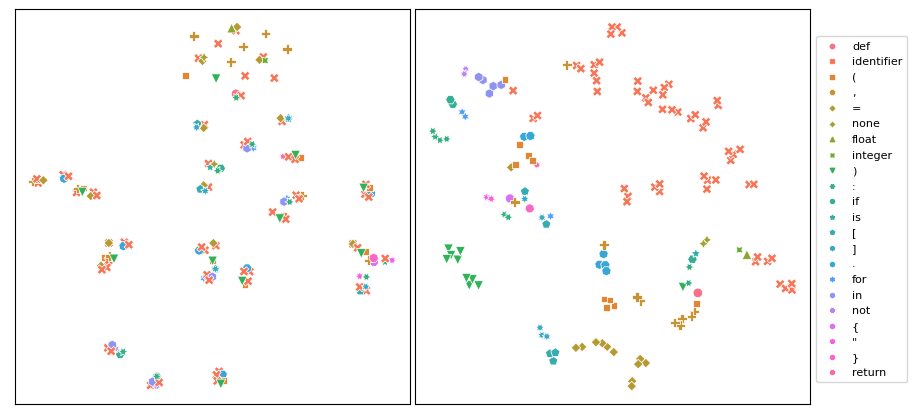

In [34]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
sns.scatterplot(data = ast_df, x = 'x', y = 'y', hue = 'type', style = 'type', s=48, ax=axes[0])
sns.scatterplot(data = model_df, x = 'x', y = 'y', hue = 'type', style = 'type', s=48, ax=axes[1])
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_xlabel('')
axes[1].set_ylabel('')

axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()
for h in handles:
    h._sizes = [10]

fig.legend(handles, labels, loc='right', bbox_to_anchor=(1.128, .5), title='', fontsize=8)
fig.tight_layout(pad=0)
fig.savefig('results/tsne_dist_cb_5.pdf', dpi=300, bbox_inches='tight')

### Attention Distribution -- Appendix

save the self-attention values using `save_graph_info.py` before running cells in this section.  

In [42]:
att_dir = 'graph_info/exp_0/'
models = os.listdir(att_dir)
distribution = {model : [] for model in models}
buckets = [1e-3, 0.05, 0.3]
#buckets = [0.05, 0.3]

for model in models:
    total_att = 0
    bucket_count = [0 for _ in buckets]
    bucket_count.append(0)
    
    info_files = os.listdir(os.path.join(att_dir, model))
    
    for graph_info in tqdm(info_files):
        with open(os.path.join(att_dir, model, graph_info), 'rb') as f:
            info = pickle.load(f)
            att = info['model_graphs']
        total_att += att.shape[0] * att.shape[1] * att.shape[2] * att.shape[3]
        bucket_count[0] += (att <= buckets[0]).sum()
        for bucket in range(1, len(buckets)):
            bucket_count[bucket] += ((buckets[bucket-1] < att) & (att <= buckets[bucket])).sum()
        
        bucket_count[-1] += (att > buckets[-1]).sum()
    
    for i, count in enumerate(bucket_count):
        bucket_count[i] = round((count/total_att)*100, 2)
    distribution[model] = np.array(bucket_count)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:08<00:00, 370.88it/s]


In [43]:
distribution

{'codet5': array([59.13, 39.25,  1.48,  0.14]),
 'graphcodebert': array([70.3 , 28.58,  1.  ,  0.12]),
 'unixcoder': array([67.28, 31.88,  0.76,  0.08]),
 'plbart': array([51.92, 46.23,  1.64,  0.22]),
 'codebert': array([74.63, 24.27,  0.97,  0.13])}